In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import json
import pandas as pd
import numpy as np
from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir(os.path.dirname(os.getcwd()))

import debias_vsi as dv

In [3]:
df = dv.get_vsi_with_scores()
df

Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/bld_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 14269.10it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/blk_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15849.43it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 12552.31it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 14391.80it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/gemini-1.5_pro.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 13956.14it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/llava_vid_7b.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 14331.38it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data

Loaded 5130 files. Loading VSI-Bench...


id      dataset    scene_name    question_type  \
0        0  arkitscenes      41069025  object_counting   
1        1  arkitscenes      41069025  object_counting   
2        2  arkitscenes      41069043  object_counting   
3        3  arkitscenes      41125700  object_counting   
4        4  arkitscenes      41125700  object_counting   
...    ...          ...           ...              ...   
5125  5151      scannet  scene0196_00   route_planning   
5126  5152      scannet  scene0378_01   route_planning   
5127  5153  arkitscenes      47331654   route_planning   
5128  5154  arkitscenes      42445026   route_planning   
5129  5155  arkitscenes      42446529   route_planning   

                                               question ground_truth  \
0                   How many table(s) are in this room?            4   
1                   How many chair(s) are in this room?            2   
2                   How many table(s) are in this room?            2   
3                    How many sofa(s) are in this room?            2   
4                   How many table(s) are in this room?            3   
...                                                 ...          ...   
5125  You are a robot beginning at the trash bin nea...            C   
5126  You are a robot beginning at the door and faci...            A   
5127  You are a robot beginning at the heater and fa...            D   
5128  You are a robot beginning at the doorframe and...            C   
5129  You are a robot beginning at the closet and fa...            A   

                                                options  \
0                                                  None   
1                                                  None   
2                                                  None   
3                                                  None   
4                                                  None   
...                                                 ...   
5125  [A. Turn Right, Turn Left, B. Turn Right, Turn...   
5126  [A. Turn Left, Turn Left, Turn Left, B. Turn L...   
5127  [A. Turn Left, Turn Right, B. Turn Back, Turn ...   
5128        [A. Turn Left, B. Turn Back, C. Turn Right]   
5129  [A. Turn Right, Turn Left, Turn Left, B. Turn ...   

      bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  ...  \
0                       0.0                    0.0         0.1  ...   
1                       0.1                    0.1         1.0  ...   
2                       0.1                    0.1         1.0  ...   
3                       0.1                    0.1         1.0  ...   
4                       0.0                    0.0         0.4  ...   
...                     ...                    ...         ...  ...   
5125                    0.0                    0.0         0.0  ...   
5126                    0.0                    0.0         0.0  ...   
5127                    0.0                    0.0         0.0  ...   
5128                    1.0                    1.0         1.0  ...   
5129                    0.0                    1.0         1.0  ...   

      rgb_sims_3q_25k  rgb_sims_3q_25k_blind  rgb_sims_manV2_5k  \
0                 0.1                    0.0                0.1   
1                 0.1                    0.1                0.1   
2                 1.0                    0.1                1.0   
3                 0.1                    0.1                0.1   
4                 0.4                    0.0                0.4   
...               ...                    ...                ...   
5125              0.0                    0.0                0.0   
5126              0.0                    0.0                0.0   
5127              0.0                    0.0                0.0   
5128              1.0                    1.0                1.0   
5129              1.0                    1.0                1.0   

      rgb_sims_manV2_5k_blind  vsi_train_10k  vsi_train_10k_blind  \
0         

In [4]:
df.columns

Index(['id', 'dataset', 'scene_name', 'question_type', 'question',
       'ground_truth', 'options', 'bld_sims_3q_10k_blind',
       'blk_sims_3q_10k_blind', 'cambrian-s', 'cambrian-s_blind',
       'gemini-1.5_pro', 'llava_vid_7b', 'llava_vid_7b_blind',
       'qwen2.5_7b_blind', 'qwen2_7b_blind', 'rgb_sims_3q_10k_blind',
       'rgb_sims_3q_25k', 'rgb_sims_3q_25k_blind', 'rgb_sims_manV2_5k',
       'rgb_sims_manV2_5k_blind', 'vsi_train_10k', 'vsi_train_10k_blind',
       'vsi_train_50k', 'vsi_train_50k_blind', 'vsi_train_5k',
       'vsi_train_5k_blind'],
      dtype='object')

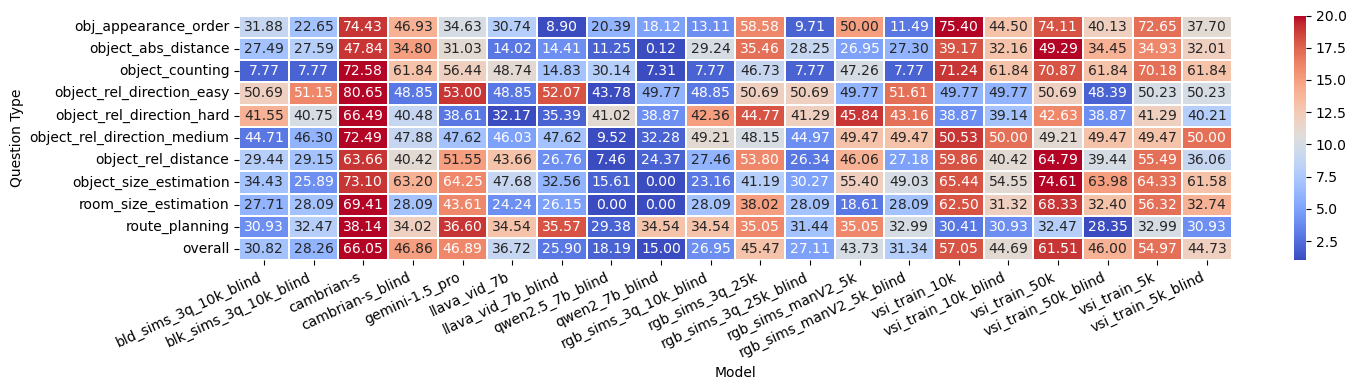

In [5]:
dv.visualize_model_scores(df);

## Absolute Distance

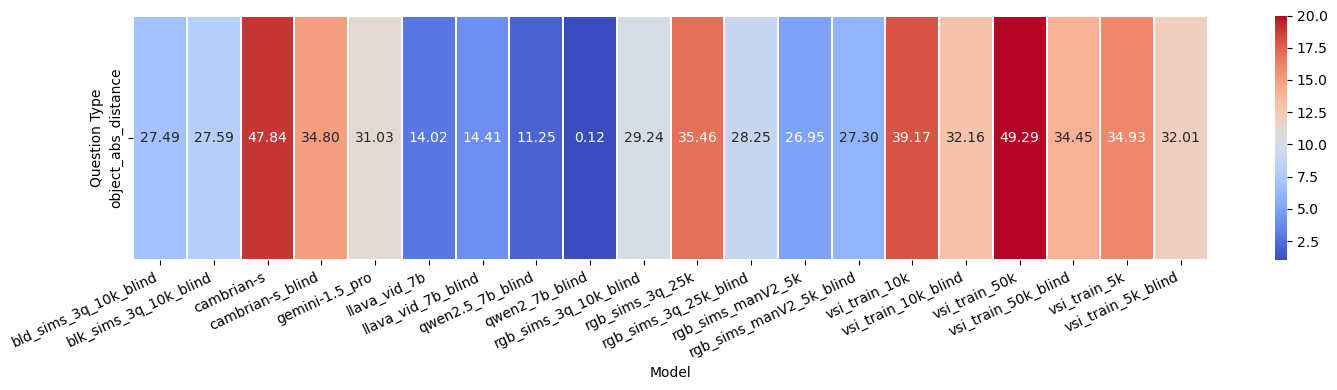

In [6]:
dv.visualize_model_scores(df.loc[df["question_type"] == "object_abs_distance"]);

In [7]:
qdf = df[df["question_type"] == "object_abs_distance"].copy()
qdf["question"].iloc[0]

'Measuring from the closest point of each object, what is the distance between the sofa and the stove (in meters)?'

In [8]:
import re

qdf["ground_truth_num"] = pd.to_numeric(qdf["ground_truth"], errors="coerce")

# question format: "What is the length of the longest dimension (length, width, or height) of the OBJECT, measured in centimeters?'"
# question format: "How many OBJECT(s) are in this room?"
# question format: "Measuring from the closest point of each object, what is the distance between the sofa and the stove (in meters)?"

qdf[["object_1", "object_2"]] = qdf["question"].str.extract(r'between the (.*?) and the (.*?)(?: \(in meters\))?\?$')
qdf["object_pair"] = qdf["question"].apply(
    lambda q: '_'.join(sorted([
        group.strip() for group in re.search(r'between the (.*?) and the (.*?)(?: \(in meters\))?\?$', q).groups()
    ]))
)
qdf["object_ordered_pair"] = qdf["question"].apply(
    lambda q: '_'.join([
        group.strip() for group in re.search(r'between the (.*?) and the (.*?)(?: \(in meters\))?\?$', q).groups()
    ])
)
qdf

id      dataset    scene_name        question_type  \
679    680  arkitscenes      41069025  object_abs_distance   
680    681  arkitscenes      41069025  object_abs_distance   
681    682  arkitscenes      41069025  object_abs_distance   
682    683  arkitscenes      41069043  object_abs_distance   
683    684  arkitscenes      41069048  object_abs_distance   
...    ...          ...           ...                  ...   
4931  4954      scannet  scene0246_00  object_abs_distance   
4932  4955      scannet  scene0246_00  object_abs_distance   
4933  4956      scannet  scene0246_00  object_abs_distance   
4934  4957      scannet  scene0246_00  object_abs_distance   
4935  4958      scannet  scene0246_00  object_abs_distance   

                                               question ground_truth options  \
679   Measuring from the closest point of each objec...          2.9    None   
680   Measuring from the closest point of each objec...          2.9    None   
681   Measuring from the closest point of each objec...          2.1    None   
682   Measuring from the closest point of each objec...          1.1    None   
683   Measuring from the closest point of each objec...          0.4    None   
...                                                 ...          ...     ...   
4931  Measuring from the closest point of each objec...          2.4    None   
4932  Measuring from the closest point of each objec...          1.0    None   
4933  Measuring from the closest point of each objec...          1.0    None   
4934  Measuring from the closest point of each objec...          1.1    None   
4935  Measuring from the closest point of each objec...          2.2    None   

      bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  ...  \
679                     0.0                    0.0         0.8  ...   
680                     0.0                    0.0         0.5  ...   
681                     0.2                    0.2         1.0  ...   
682                     0.1                    0.1         0.9  ...   
683                     0.0                    0.0         1.0  ...   
...                     ...                    ...         ...  ...   
4931                    0.1                    0.1         0.1  ...   
4932                    0.7                    0.7         0.7  ...   
4933                    1.0                    0.7         0.0  ...   
4934                    0.9                    0.9         0.0  ...   
4935                    0.1                    0.1         0.1  ...   

      vsi_train_10k_blind  vsi_train_50k  vsi_train_50k_blind  vsi_train_5k  \
679                   0.4            1.0                  0.5           0.7   
680                   0.4            0.3                  1.0           0.7   
681                   0.9            0.8                  0.2           0.8   
682                   0.0            0.0                  0.0           0.3   
683                   0.0            0.6                  0.0           0.0   
...                   ...            ...                  ...           ...   
4931                  0.7            0.8                  0.8           0.2   
4932                  0.0            0.1                  0.7           0.5   
4933                  0.3            0.0                  1.0           0.5   
4934                  0.0            0.0                  0.9           0.5   
4935                  0.9            0.8                  0.8           0.3   

      vsi_train_5k_blind  ground_truth_num    object_1    object_2  \
679                  0.7               2.9        sofa       stove   
680                  0.7               2.9          tv       stove   
681                  0.4               2.1          tv        sofa   
682                  0.5               1.1          tv         bed   
683                  0.0               0.4      toilet     bathtub   
...                  ...               ...         ...         ...   
4931      

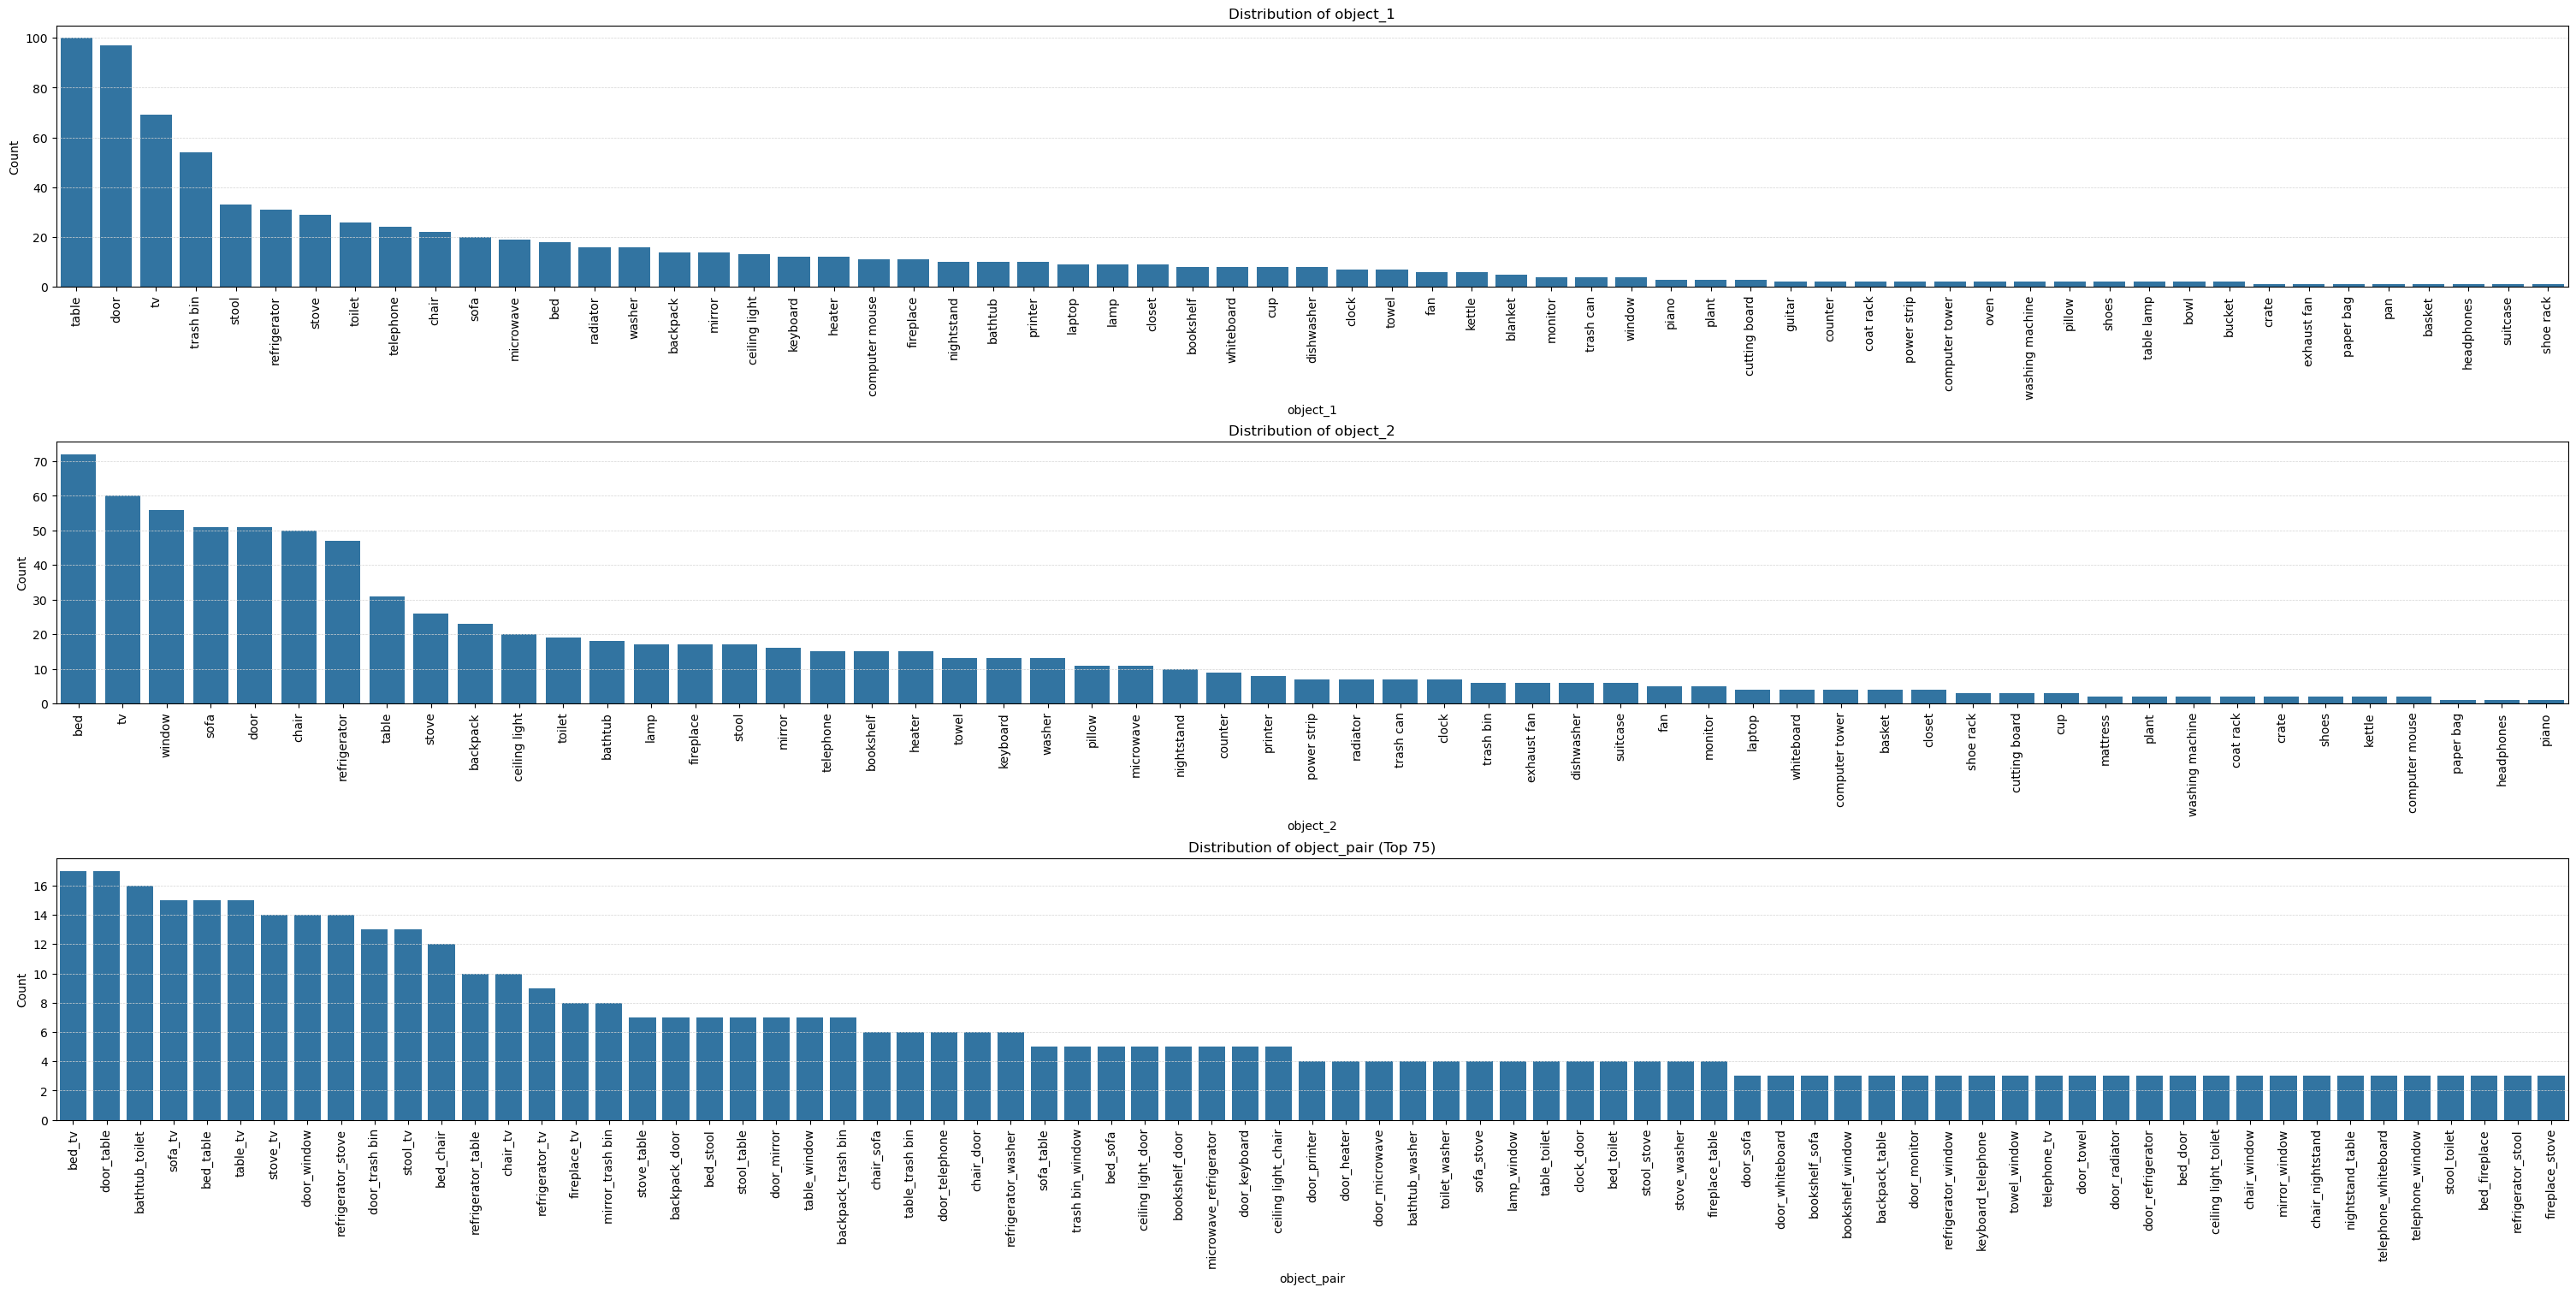

In [9]:
cols = ["object_1", "object_2", "object_pair",
        # "object_ordered_pair"
]

fig, axes = plt.subplots(len(cols), 1, figsize=(30, 15), constrained_layout=True)

max_k = 75
for i, col in enumerate(cols):
    top_values = qdf[col].value_counts().head(max_k).index
    sns.countplot(data=qdf[qdf[col].isin(top_values)], x=col, order=top_values, ax=axes[i])
    title = f"Distribution of {col}"
    if len(top_values) == max_k:
        title += f" (Top {max_k})"
    axes[i].grid(visible=True, which='major', axis='y', color='lightgray', linestyle='--', linewidth=0.5)
    axes[i].set_title(title)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)

plt.show()

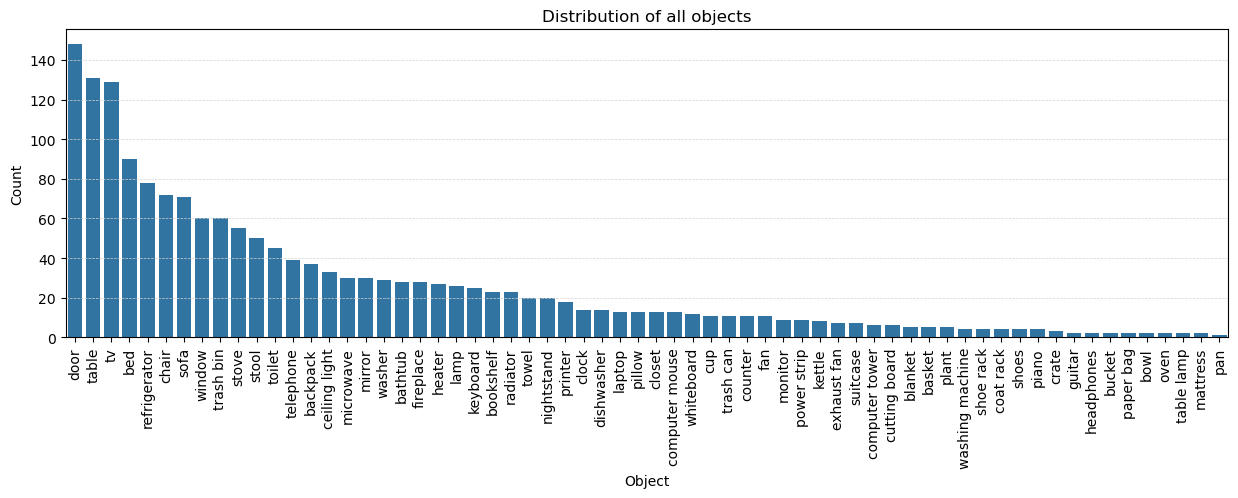

In [10]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.grid(visible=True, which='both', color='lightgray', linestyle='--', linewidth=0.5)
# finally, also plot the distribution of distinct objects in either slot (object_1 or object_2)
all_objects = qdf["object_1"].tolist() + qdf["object_2"].tolist()
all_objects = pd.Series(all_objects).value_counts().reset_index()
# just plot the object and values normally
sns.barplot(data=all_objects, x="index", y="count", ax=ax)
ax.set_title("Distribution of all objects")
ax.set_xlabel("Object")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=90)
plt.show()

In [11]:
qdf.iloc[0]

id                                                                       680
dataset                                                          arkitscenes
scene_name                                                          41069025
question_type                                            object_abs_distance
question                   Measuring from the closest point of each objec...
ground_truth                                                             2.9
options                                                                 None
bld_sims_3q_10k_blind                                                    0.0
blk_sims_3q_10k_blind                                                    0.0
cambrian-s                                                               0.8
cambrian-s_blind                                                         1.0
gemini-1.5_pro                                                           0.6
llava_vid_7b                                                             0.1

In [12]:
qdf["ground_truth"].value_counts()

ground_truth
1.0    42
0.9    37
0.7    33
1.5    31
1.2    30
       ..
8.7     1
8.5     1
9.4     1
5.2     1
5.7     1
Name: count, Length: 72, dtype: int64

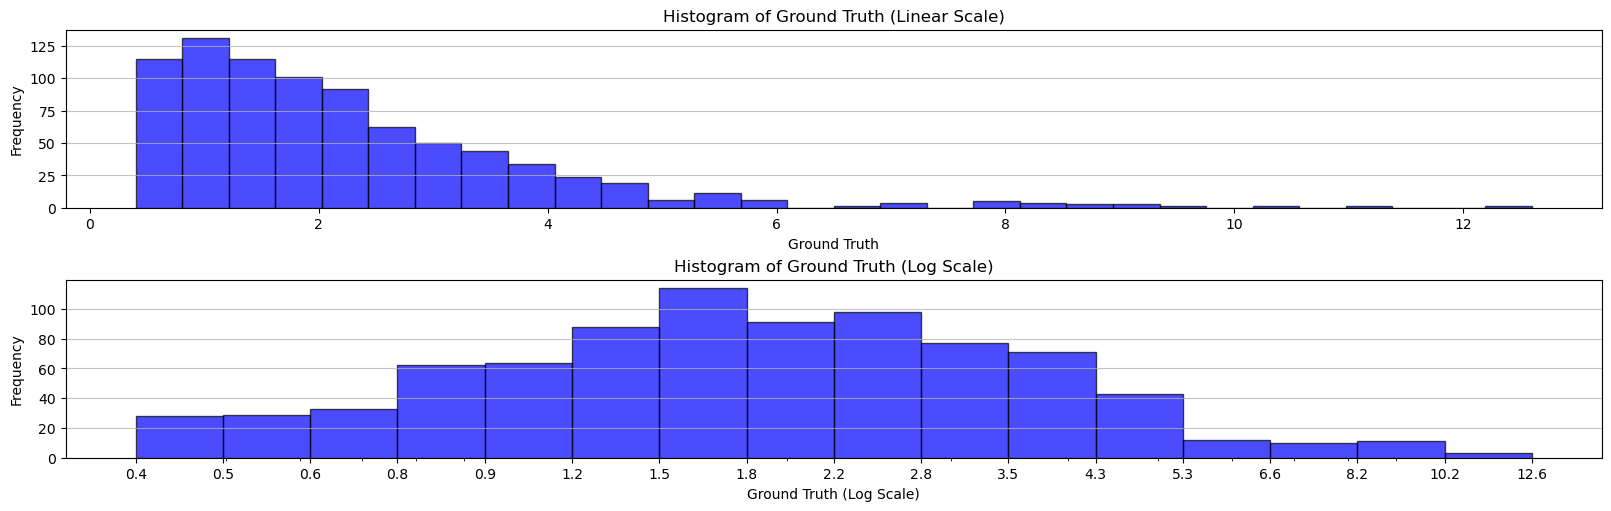

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(16, 5), constrained_layout=True)

# First plot: Linear scale
gt_series = qdf['ground_truth_num'].dropna()
gt_series.plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black', ax=axes[0], density=False)
axes[0].set_xlabel('Ground Truth')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Ground Truth (Linear Scale)')
axes[0].grid(axis='y', alpha=0.75)

# Second plot: Log scale
bins = np.logspace(np.log10(gt_series.min()), np.log10(gt_series.max()), 17)
gt_series.plot(kind='hist', bins=bins, alpha=0.7, color='blue', edgecolor='black', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_xlabel('Ground Truth (Log Scale)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Ground Truth (Log Scale)')
axes[1].grid(axis='y', alpha=0.75)

# Set x-ticks for the log scale plot
ticks = bins
axes[1].set_xticks(ticks)
axes[1].set_xticklabels([f"{tick:.1f}" for tick in ticks])

plt.show()


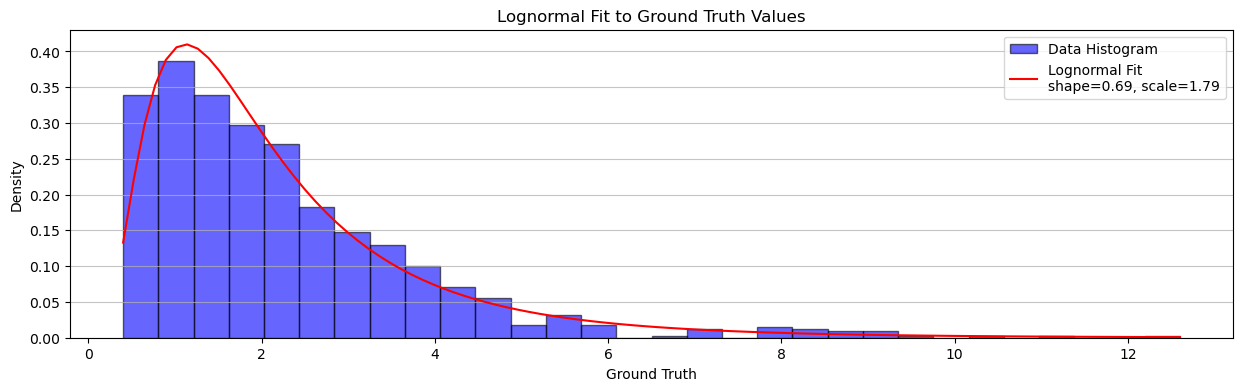

Lognormal fit: shape=0.69, loc=0.00, scale=1.79
Kolmogorov-Smirnov Test Statistic: 0.0371, p-value: 0.1972


In [14]:
from scipy.stats import lognorm
import numpy as np
from scipy.stats import kstest

# Extract ground truth values and ensure they are positive
ground_truth_values = qdf['ground_truth_num'].dropna()
ground_truth_values = ground_truth_values[ground_truth_values > 0]

# Fit a lognormal distribution to the data
shape, loc, scale = lognorm.fit(ground_truth_values, floc=0)  # Fix location to 0 for lognormal

# Generate the fitted distribution
x = np.linspace(ground_truth_values.min(), ground_truth_values.max(), 100)
pdf = lognorm.pdf(x, shape, loc, scale)

# Plot the histogram of the data and the fitted distribution
plt.figure(figsize=(15, 4))
plt.hist(ground_truth_values, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Data Histogram')
plt.plot(x, pdf, 'r-', label=f'Lognormal Fit\nshape={shape:.2f}, scale={scale:.2f}')
plt.xlabel('Ground Truth')
plt.ylabel('Density')
plt.title('Lognormal Fit to Ground Truth Values')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Evaluate goodness of fit using the Kolmogorov-Smirnov test
ks_stat, p_value = kstest(ground_truth_values, 'lognorm', args=(shape, loc, scale))
print(f"Lognormal fit: shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f}")
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

In [15]:
qdf.groupby("object_pair").agg(mean=("ground_truth_num", "mean"), std=("ground_truth_num", "std"), ct=("ground_truth_num", "count")).reset_index().sort_values("mean", ascending=False).T

228           153                   19   \
object_pair  kettle_table lamp  crate_laptop  basket_cutting board   
mean                      11.3          10.2                   9.1   
std                        NaN           NaN                   NaN   
ct                           1             1                     1   

                    249                  237                   356  \
object_pair  laptop_pan  keyboard_whiteboard  trash can_whiteboard   
mean                8.8                  7.1                   6.5   
std                 NaN                  NaN              8.626703   
ct                    1                    1                     2   

                              164                 302                 260  \
object_pair  dishwasher_fireplace  radiator_trash bin  microwave_radiator   
mean                         6.35                 6.0                 5.8   
std                      2.899138                 NaN                 NaN   
ct                              2                   1                   1   

                            65   ...                151          191  \
object_pair  bookshelf_radiator  ...  counter_trash bin  door_toilet   
mean                        5.7  ...               0.45          0.4   
std                         NaN  ...           0.070711          NaN   
ct                            1  ...                  2            1   

                              148            217                146  \
object_pair  counter_refrigerator  heater_laptop  counter_microwave   
mean                          0.4            0.4                0.4   
std                           NaN            NaN                NaN   
ct                              1              1                  1   

                             221                     136               291  \
object_pair  heater_refrigerator  computer mouse_monitor  power strip_sofa   
mean                         0.4                     0.4               0.4   
std                          NaN                     NaN               NaN   
ct                             1                       1                 1   

                       98            0    
object_pair  chair_monitor  backpack_bed  
mean                   0.4           0.4  
std                    NaN           NaN  
ct                       1             1  

[4 rows x 359 columns]

In [16]:
qqdf = qdf.copy()
qqdf["log_ground_truth_num"] = np.log(qqdf["ground_truth_num"] + 1.0)

pair_stats = qqdf.groupby('object_pair').agg(
    count=('id', 'count'),
    mean=('ground_truth_num', 'mean'),
    std=('ground_truth_num', 'std'),
    mean_log=('log_ground_truth_num', 'mean'),
    std_log=('log_ground_truth_num', 'std')
).reset_index()
pair_stats['std_log'] = pair_stats['std_log'].fillna(0)
pair_stats['ratio_log'] = (pair_stats['std_log'] / (pair_stats['mean_log'] + 1e-7)).fillna(0)
pair_stats

object_pair  count      mean       std  mean_log   std_log  \
0               backpack_bed      1  0.400000       NaN  0.336472  0.000000   
1         backpack_bookshelf      1  3.700000       NaN  1.547563  0.000000   
2             backpack_clock      1  1.500000       NaN  0.916291  0.000000   
3    backpack_computer mouse      1  1.600000       NaN  0.955511  0.000000   
4           backpack_counter      1  1.000000       NaN  0.693147  0.000000   
..                       ...    ...       ...       ...       ...       ...   
354             trash bin_tv      2  3.000000  0.000000  1.386294  0.000000   
355         trash bin_window      5  2.040000  1.572578  1.022817  0.450067   
356     trash can_whiteboard      2  6.500000  8.626703  1.473271  1.607676   
357                tv_washer      3  3.433333  0.665833  1.481276  0.155467   
358                tv_window      2  3.300000  0.565685  1.454270  0.131936   

     ratio_log  
0     0.000000  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.000000  
..         ...  
354   0.000000  
355   0.440027  
356   1.091229  
357   0.104955  
358   0.090723  

[359 rows x 7 columns]

In [17]:
len(qdf)

834

In [18]:
pd.set_option('display.max_rows', 100)
budget = 300

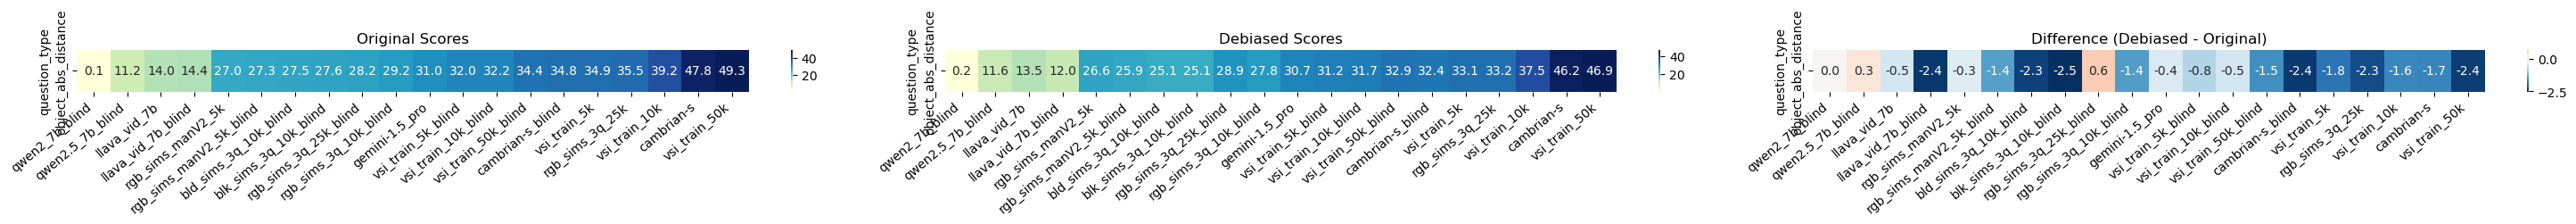

In [19]:
ids = dv.filter_object_abs_distance_v1(qdf, budget=budget)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

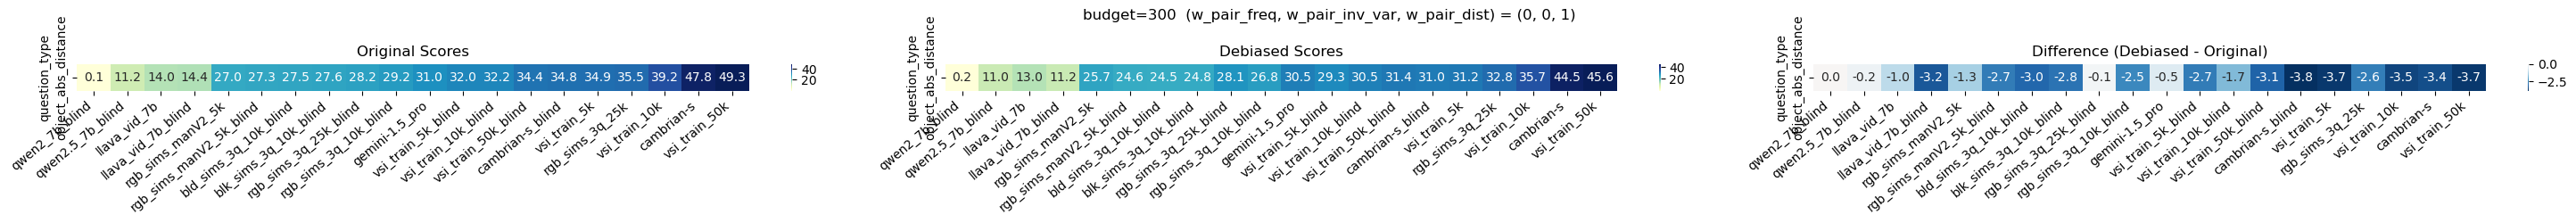

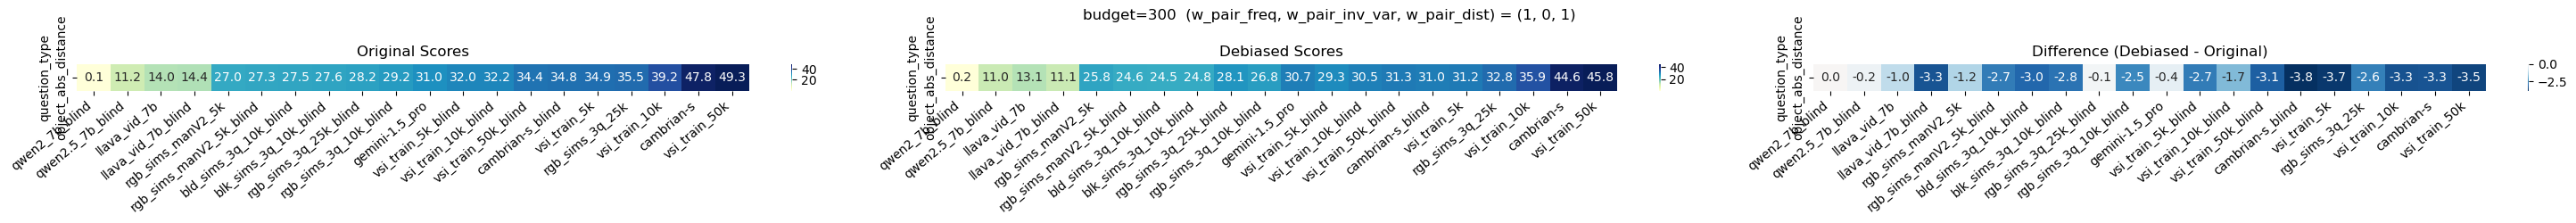

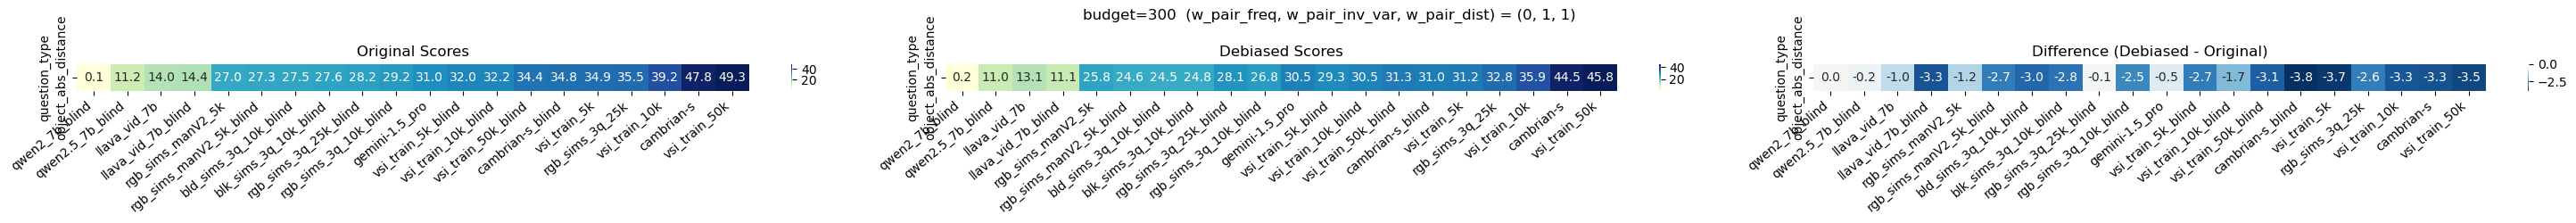

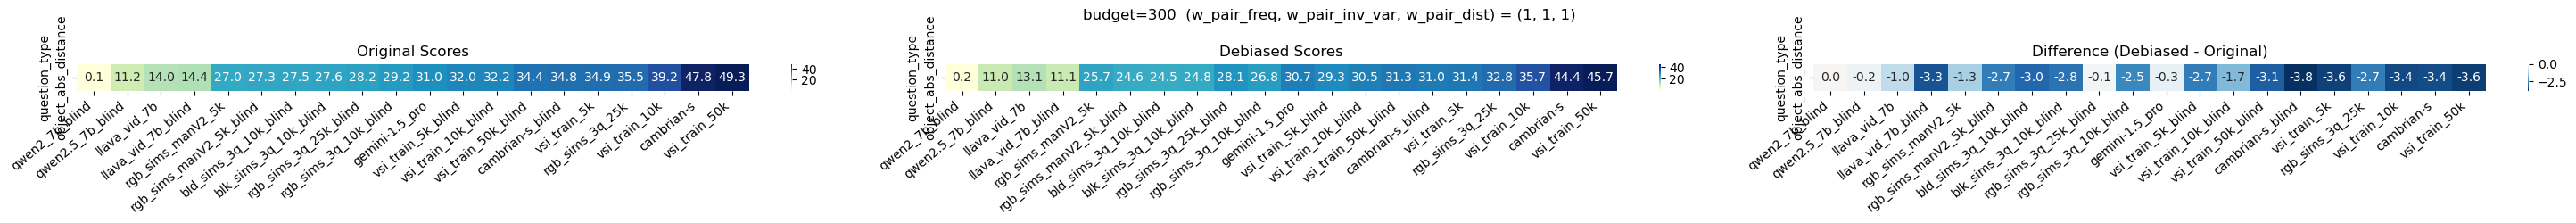

In [20]:
for w_pair_freq, w_pair_inv_var, w_pair_dist in (
    # (1, 0, 0),
    # (0, 1, 0),
    (0, 0, 1),
    # (1, 1, 0),
    (1, 0, 1),
    (0, 1, 1),
    (1, 1, 1),
):
    ids = dv.filter_object_abs_distance_scored(qdf, budget=budget, w_pair_freq=w_pair_freq, w_pair_inv_var=w_pair_inv_var, w_pair_dist=w_pair_dist, min_samples_per_pair=3)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}  (w_pair_freq, w_pair_inv_var, w_pair_dist) = ({w_pair_freq}, {w_pair_inv_var}, {w_pair_dist})");

In [21]:
## BELOW IS A SUPERSET
# for w_pair_freq, w_ratio, w_log_dist in (
#     # (1, 0, 0),
#     # (0, 1, 0),
#     (0, 0, 1),
#     # (1, 1, 0),
#     (1, 0, 1),
#     (0, 1, 1),
#     (1, 1, 1),
# ):
#     ids = dv.filter_object_abs_distance_scored_log(qdf, budget=budget, w_pair_freq=w_pair_freq, w_ratio=w_ratio, w_log_dist=w_log_dist, min_samples_per_pair=3)
#     deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
#     removed_qdf = qdf.loc[qdf["id"].isin(ids)]
#     # dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"w_pair_freq={w_pair_freq}, w_ratio={w_ratio}, w_log_dist={w_log_dist}");
#     dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}  (w_pair_freq, w_ratio, w_log_dist) = ({w_pair_freq}, {w_ratio}, {w_log_dist})");

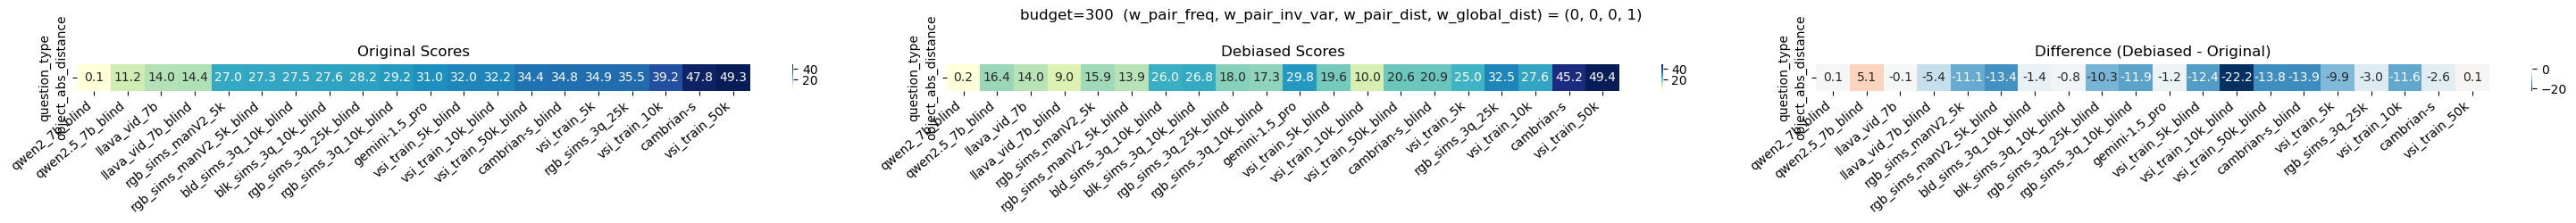

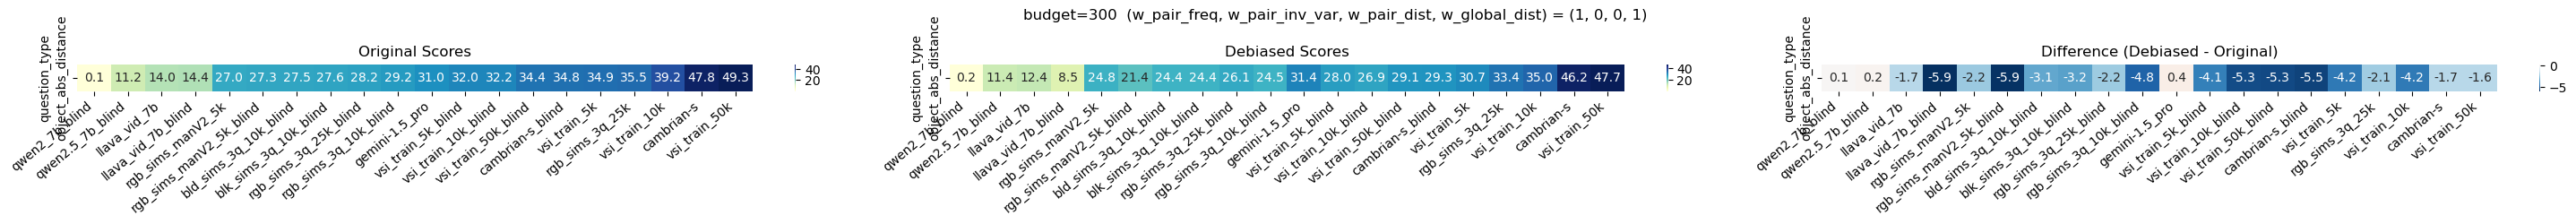

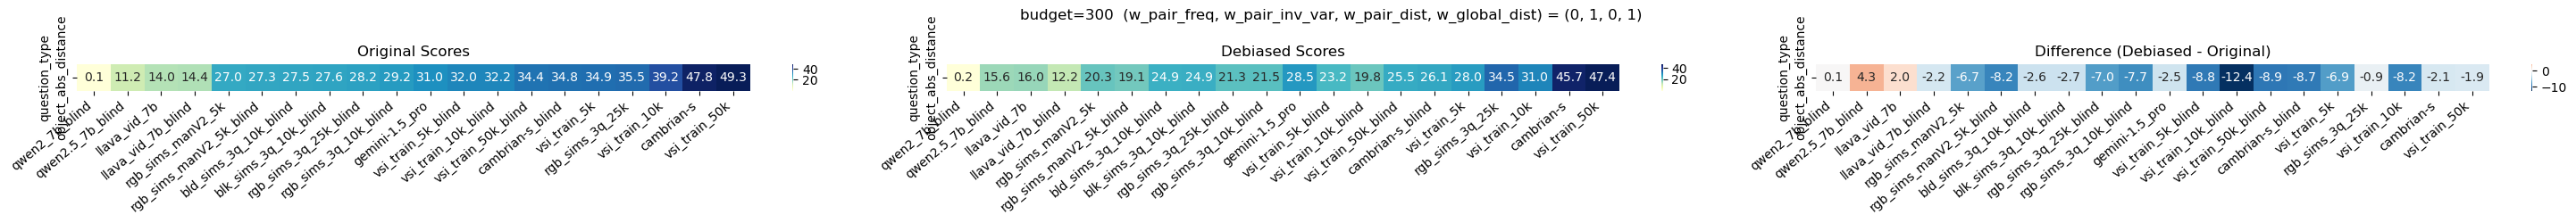

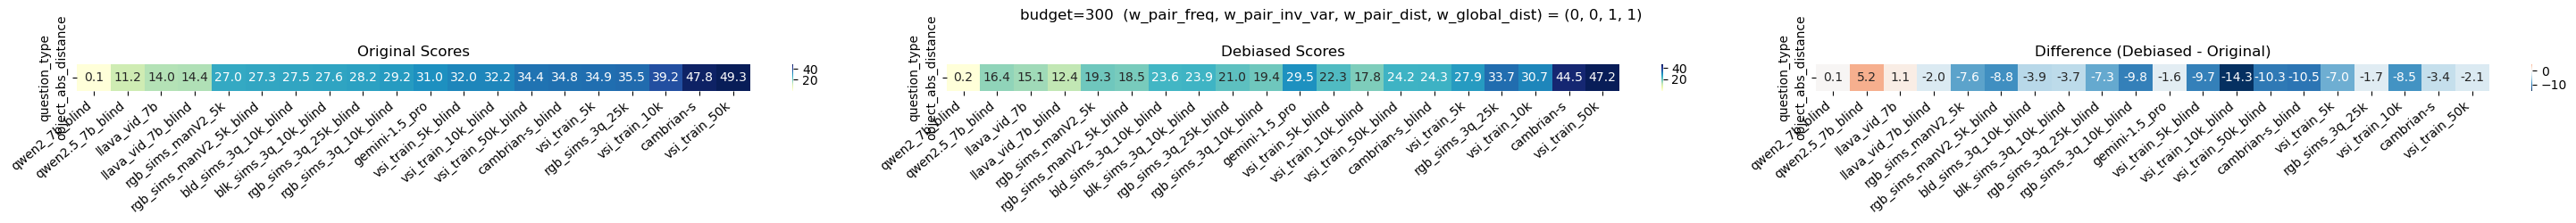

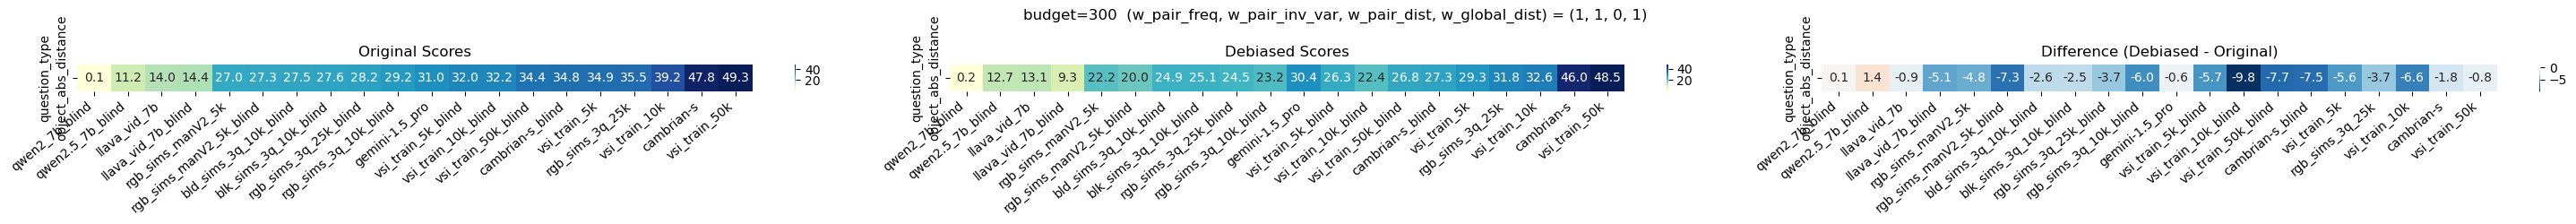

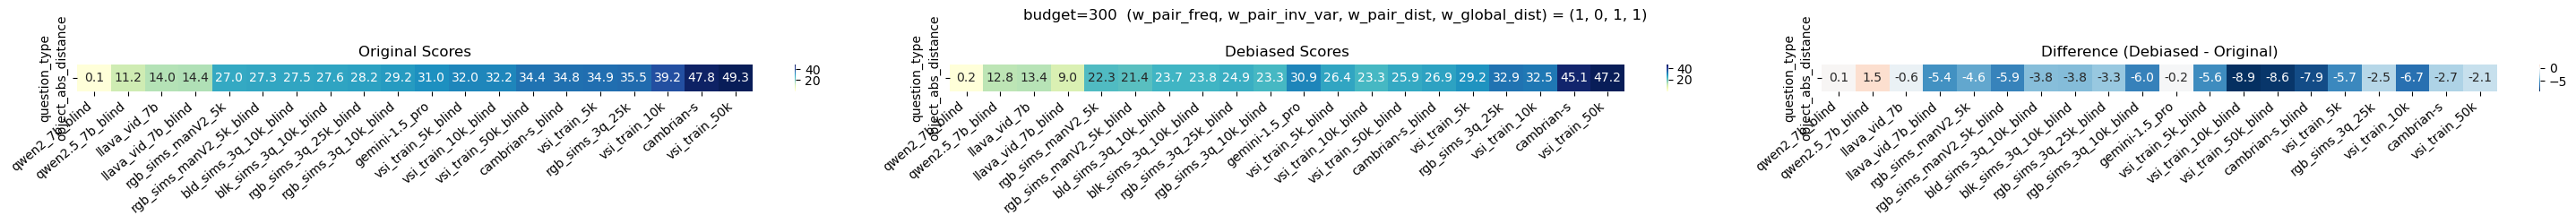

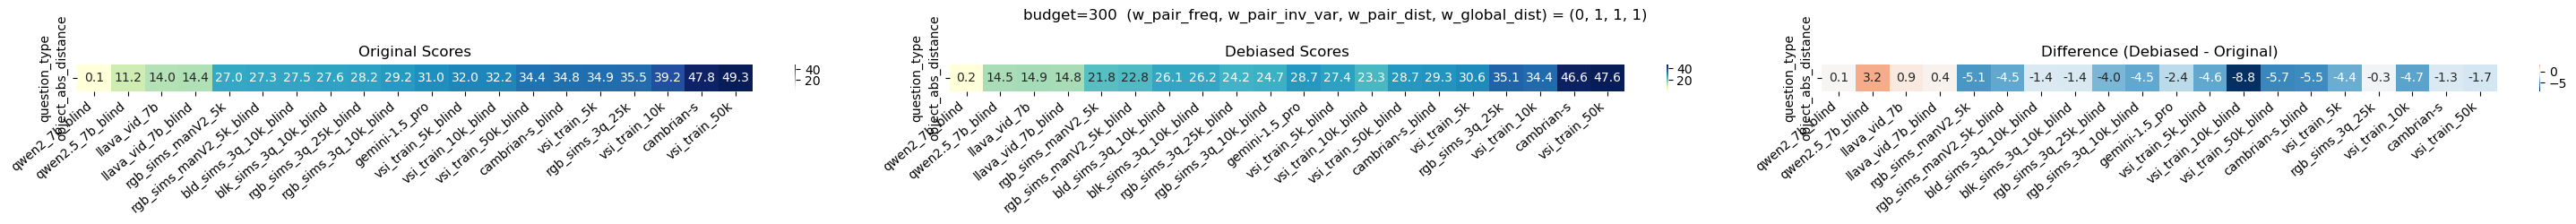

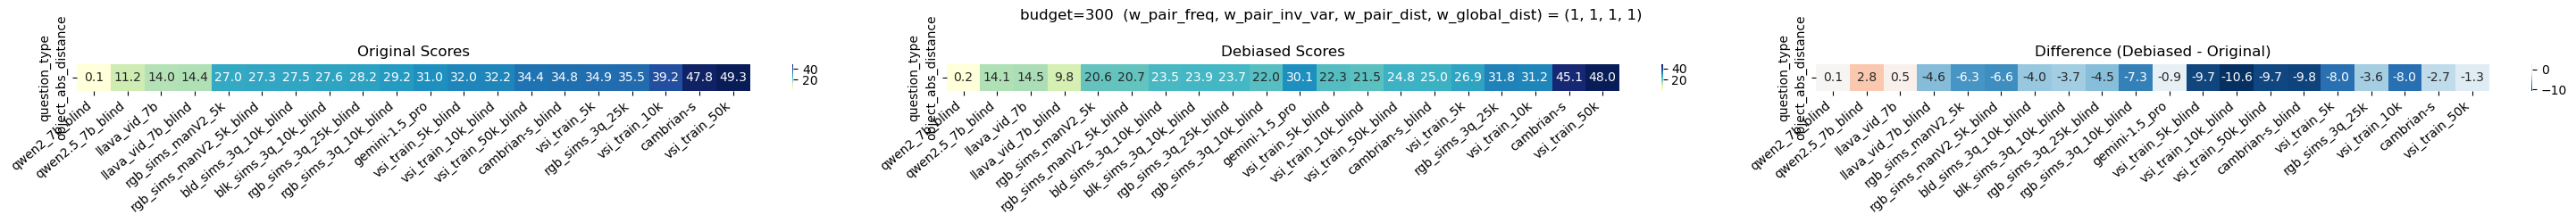

In [22]:
for w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist in (
    # (1, 0, 0, 0),
    # (0, 1, 0, 0),
    # (0, 0, 1, 0),
    (0, 0, 0, 1),
    # (1, 1, 0, 0),
    # (1, 0, 1, 0),
    (1, 0, 0, 1),
    # (0, 1, 1, 0),
    (0, 1, 0, 1),
    (0, 0, 1, 1),
    # (1, 1, 1, 0),
    (1, 1, 0, 1),
    (1, 0, 1, 1),
    (0, 1, 1, 1),
    (1, 1, 1, 1),
):
    ids = dv.filter_object_abs_distance_scored_log_global(qdf, budget=budget, w_pair_freq=w_pair_freq, w_pair_inv_var=w_pair_inv_var, w_pair_dist=w_pair_dist, w_global_dist=w_global_dist, min_samples_per_pair=0)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    # dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"w_pair_freq={w_pair_freq}, w_ratio={w_ratio}, w_log_dist={w_log_dist}, w_global_pdf={w_global_pdf}");
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = ({w_pair_freq}, {w_pair_inv_var}, {w_pair_dist}, {w_global_dist})");

Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79


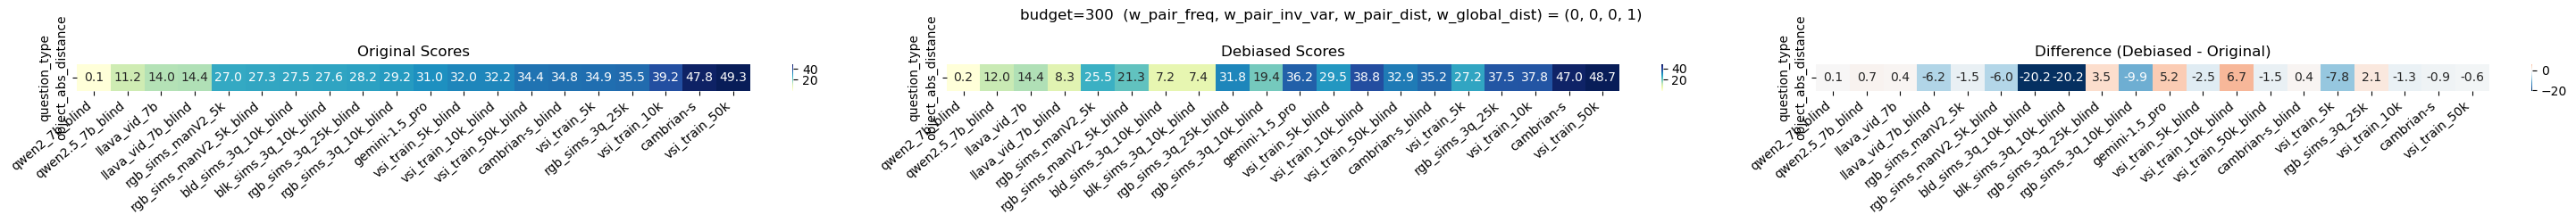

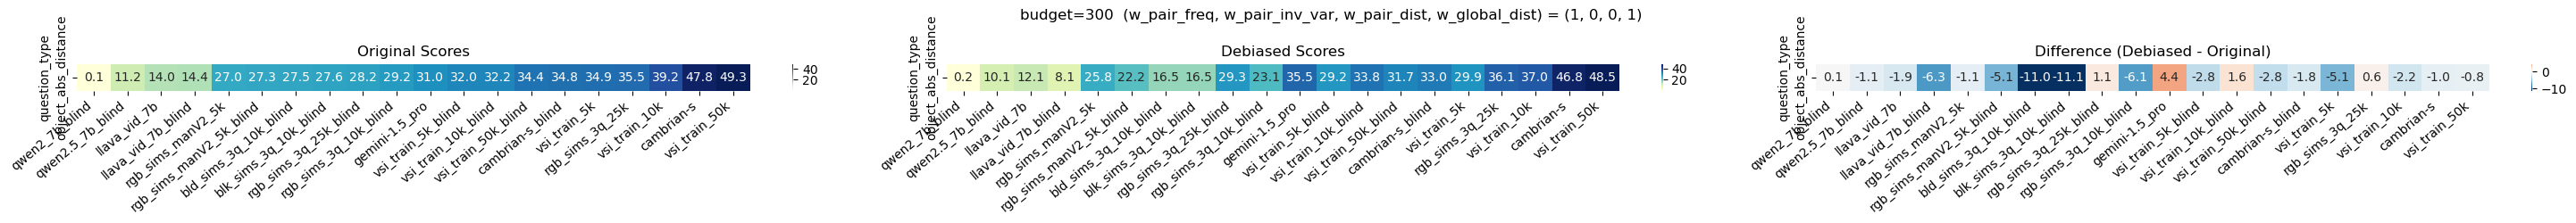

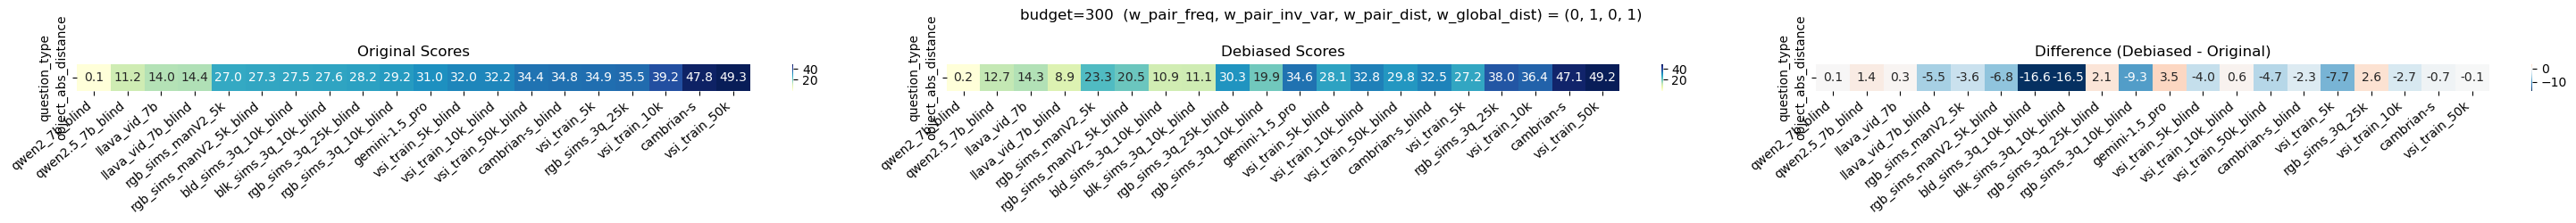

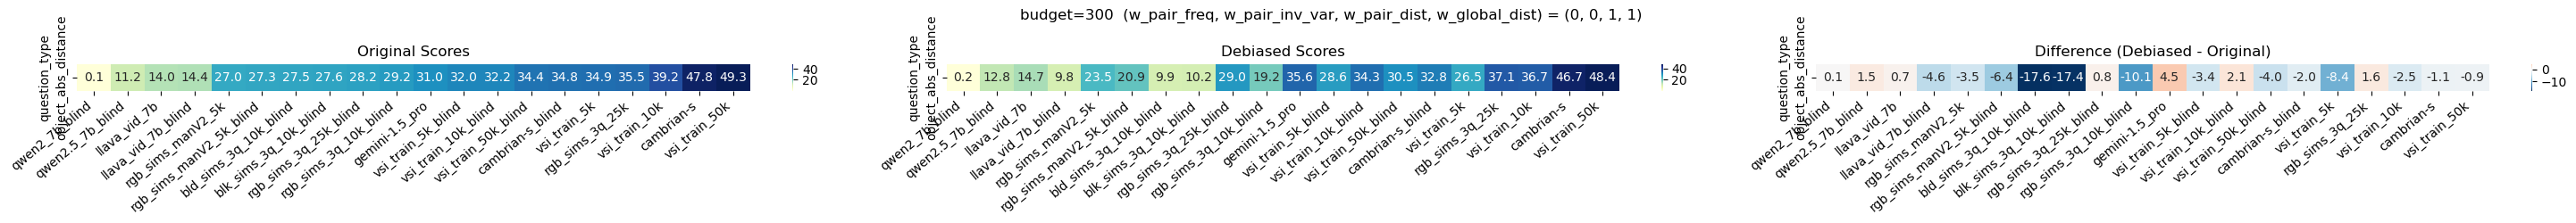

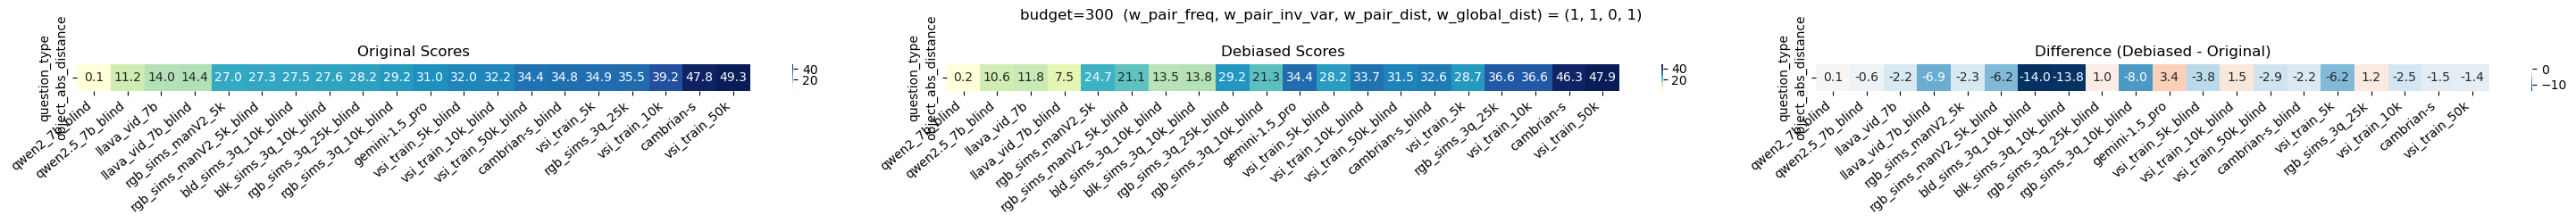

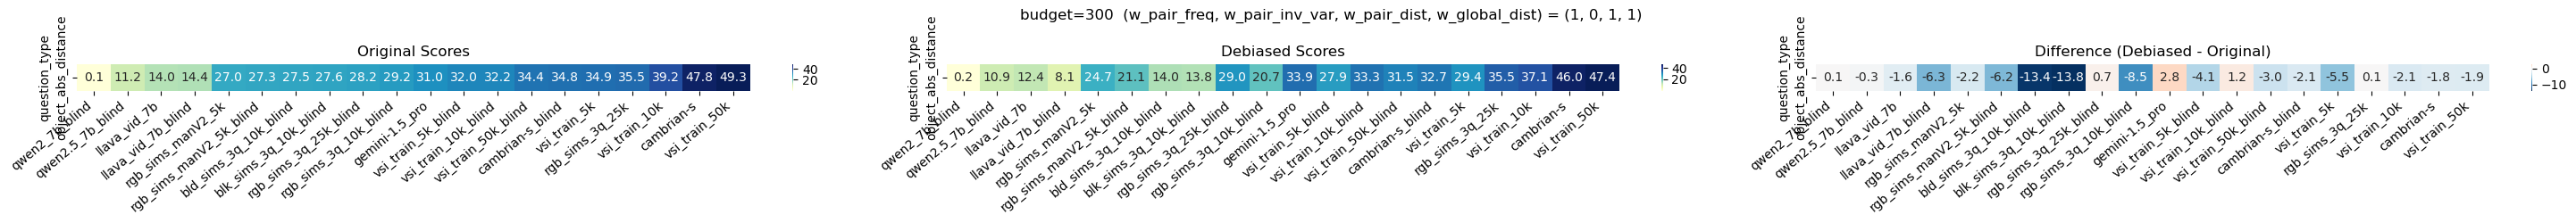

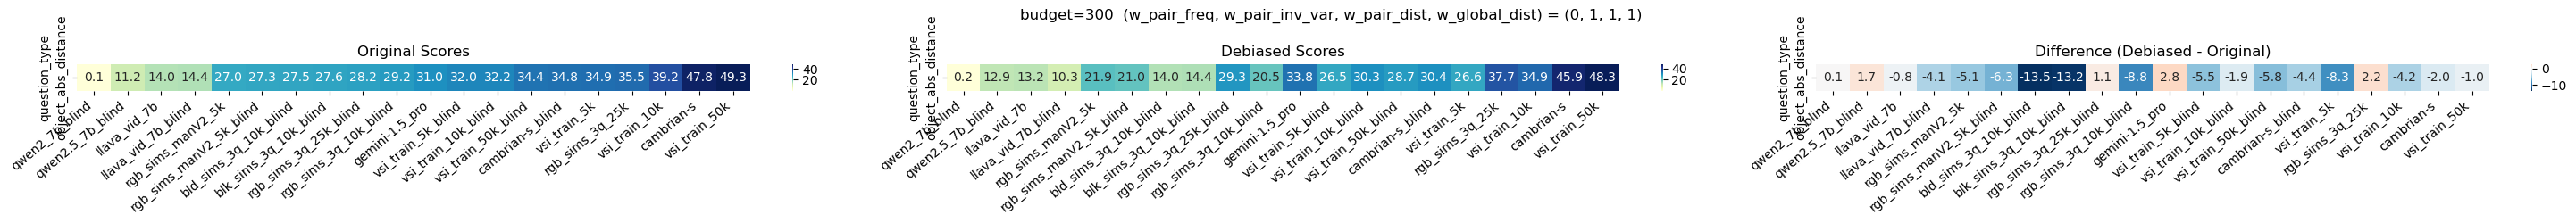

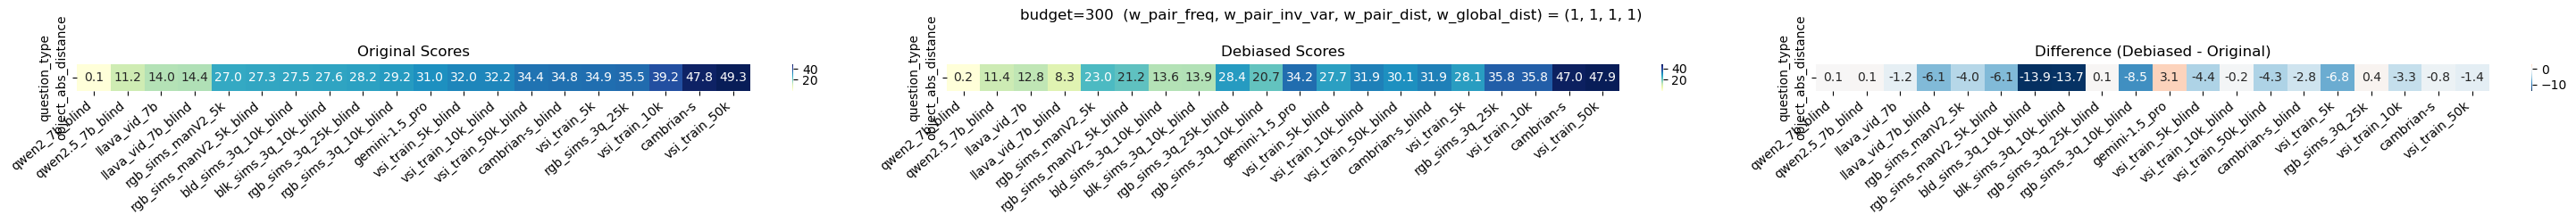

In [23]:
for w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist in (
    # (1, 0, 0, 0),
    # (0, 1, 0, 0),
    # (0, 0, 1, 0),
    (0, 0, 0, 1),
    # (1, 1, 0, 0),
    # (1, 0, 1, 0),
    (1, 0, 0, 1),
    # (0, 1, 1, 0),
    (0, 1, 0, 1),
    (0, 0, 1, 1),
    # (1, 1, 1, 0),
    (1, 1, 0, 1),
    (1, 0, 1, 1),
    (0, 1, 1, 1),
    (1, 1, 1, 1),
):
    ids = dv.filter_object_abs_distance_scored_log_global_pdf(qdf, budget=budget, w_pair_freq=w_pair_freq, w_pair_inv_var=w_pair_inv_var, w_pair_dist=w_pair_dist, w_global_dist=w_global_dist, min_samples_per_pair=0)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    # dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"w_pair_freq={w_pair_freq}, w_ratio={w_ratio}, w_log_dist={w_log_dist}, w_global_pdf={w_global_pdf}");
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = ({w_pair_freq}, {w_pair_inv_var}, {w_pair_dist}, {w_global_dist})");

Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
budget=300  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = (0, 0, 0, 1)
	- DIFFERENT:201 in ids but not in ids_pdf
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
budget=300  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = (1, 0, 0, 1)
	- DIFFERENT:78 in ids but not in ids_pdf
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
budget=300  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = (0, 1, 0, 1)
	- DIFFERENT:135 in ids but not in ids_pdf
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
budget=300  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = (0, 0, 1, 1)
	- DIFFERENT:146 in ids but not in ids_pdf
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
budget=300  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = (1, 1, 0, 1)
	- DIFFERENT:121 in ids but not in ids_pdf
Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79
budget=300  (w_pair_freq, w_pai

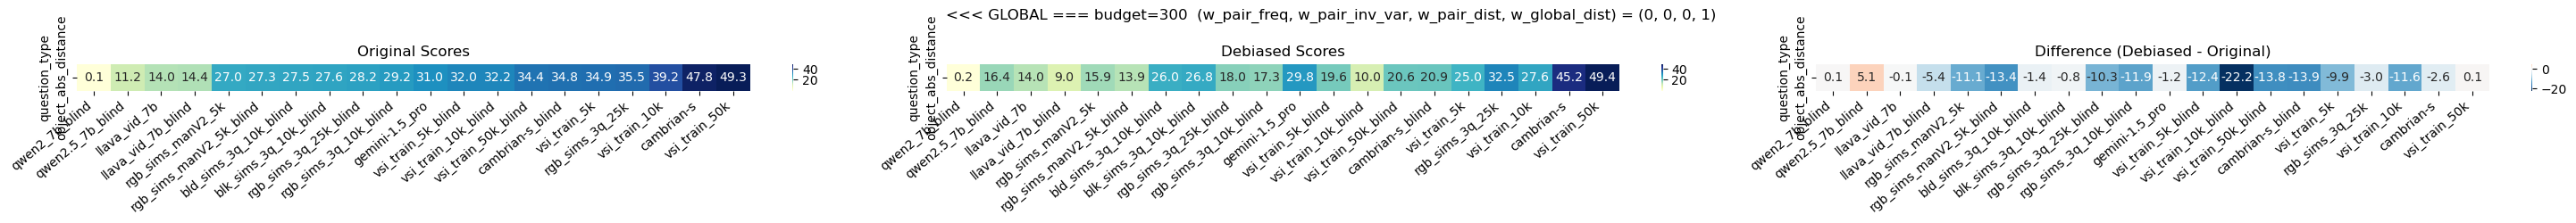

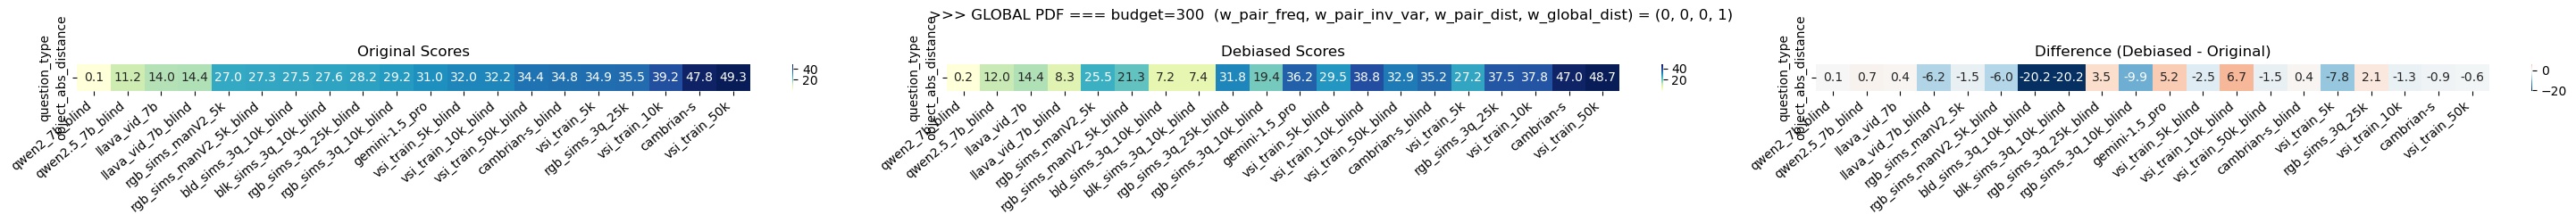

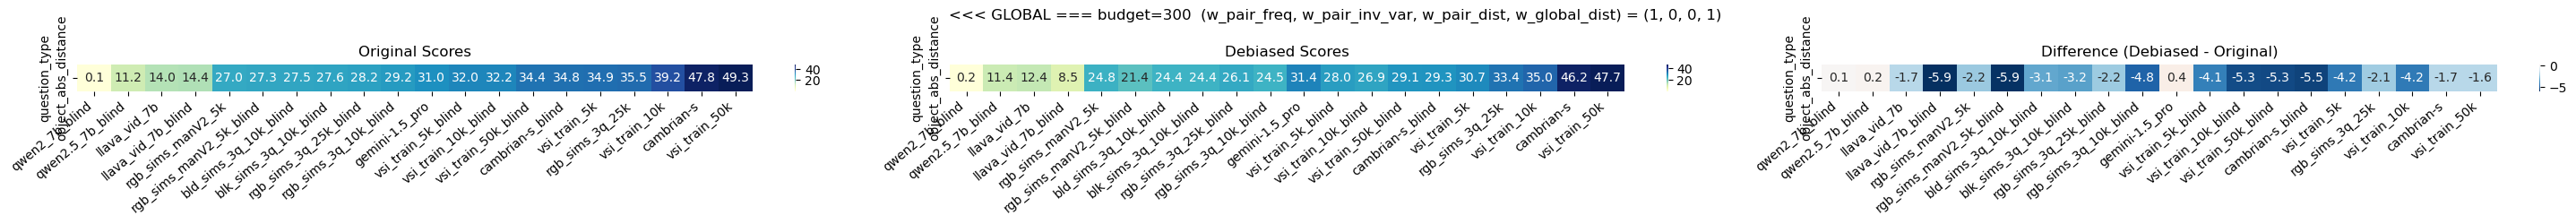

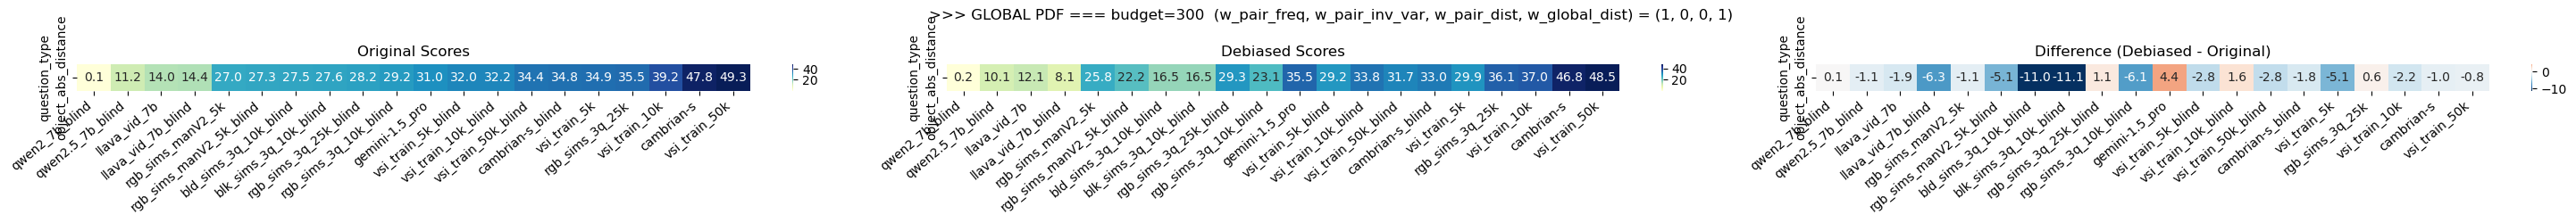

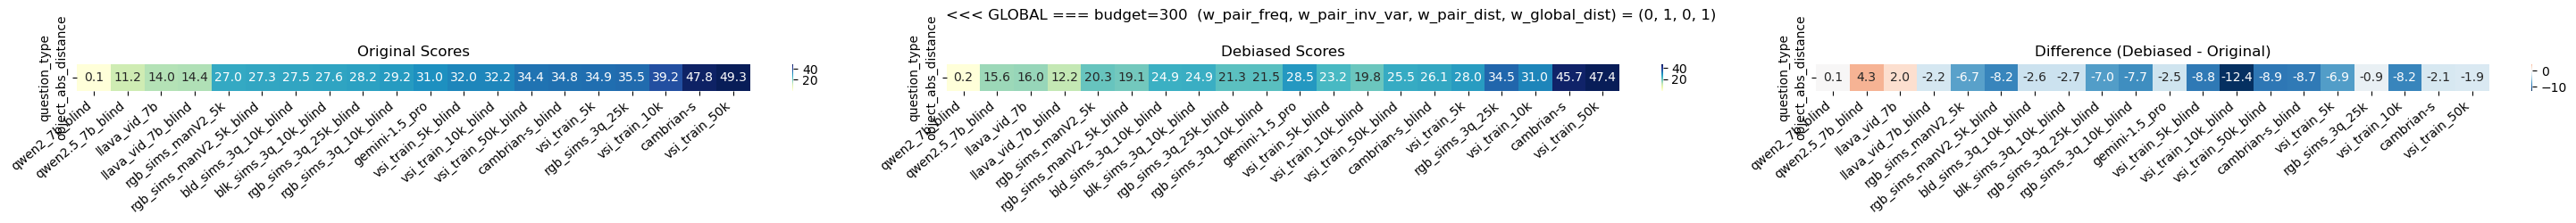

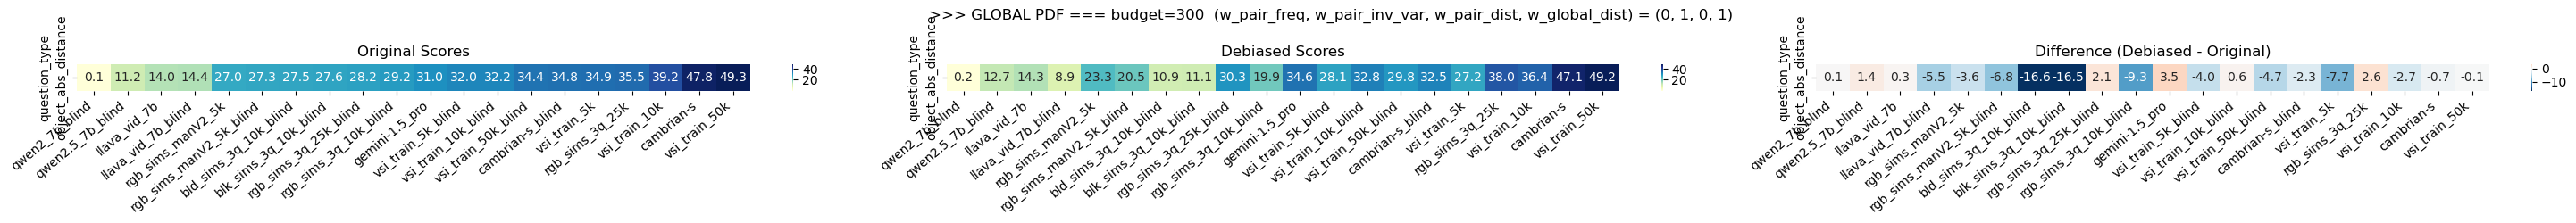

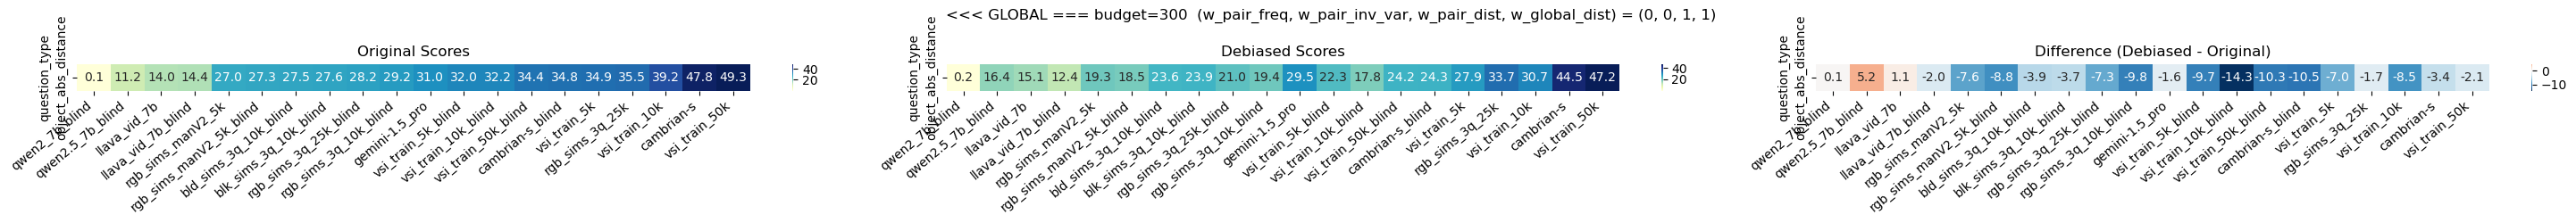

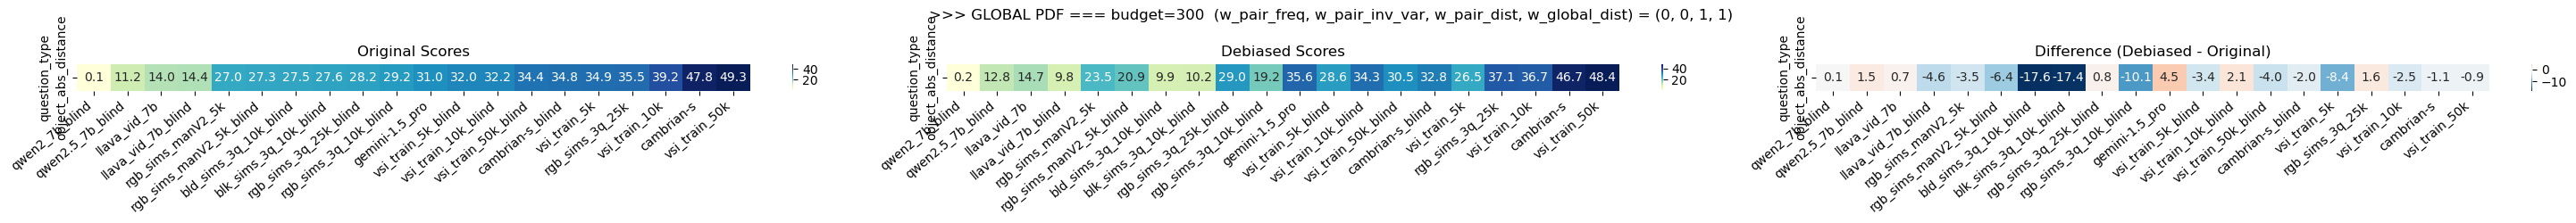

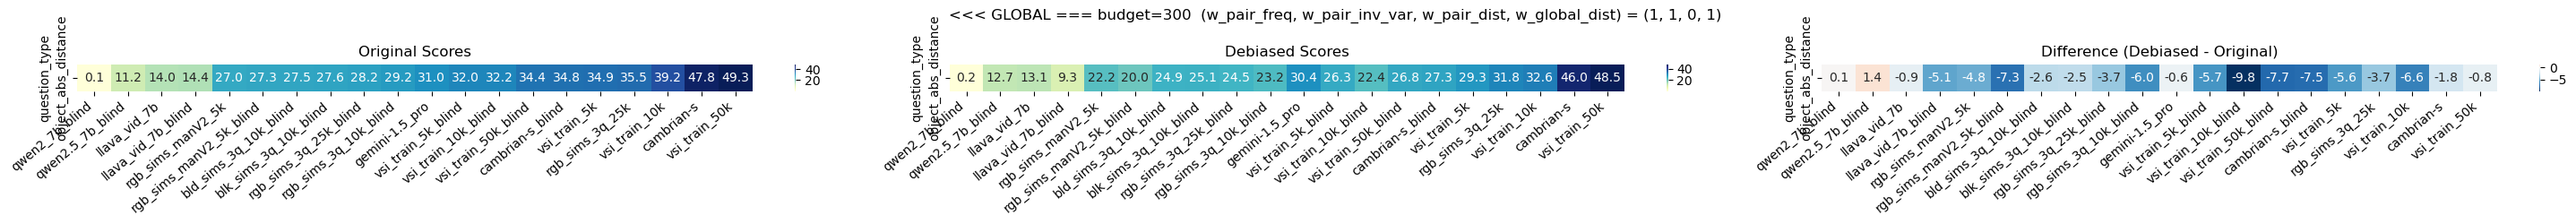

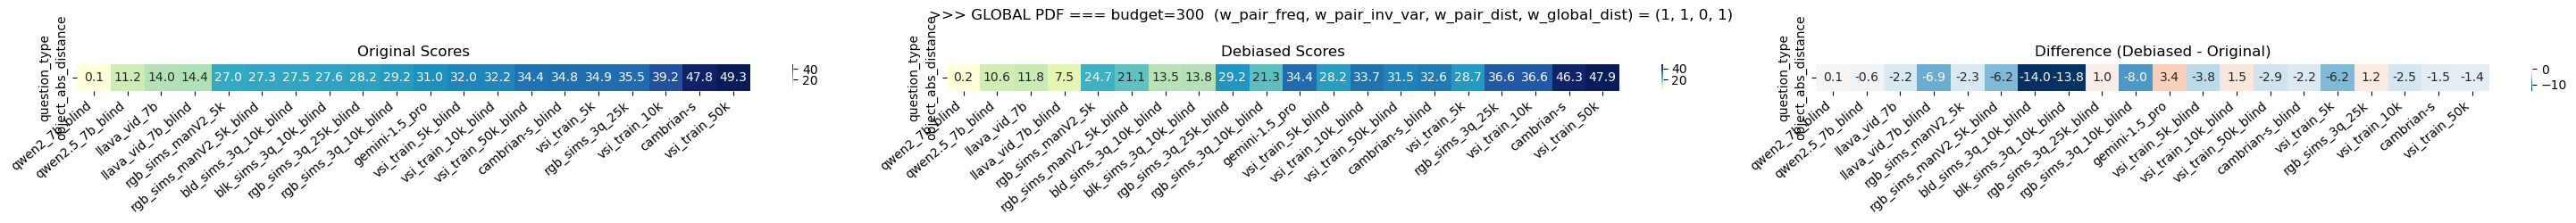

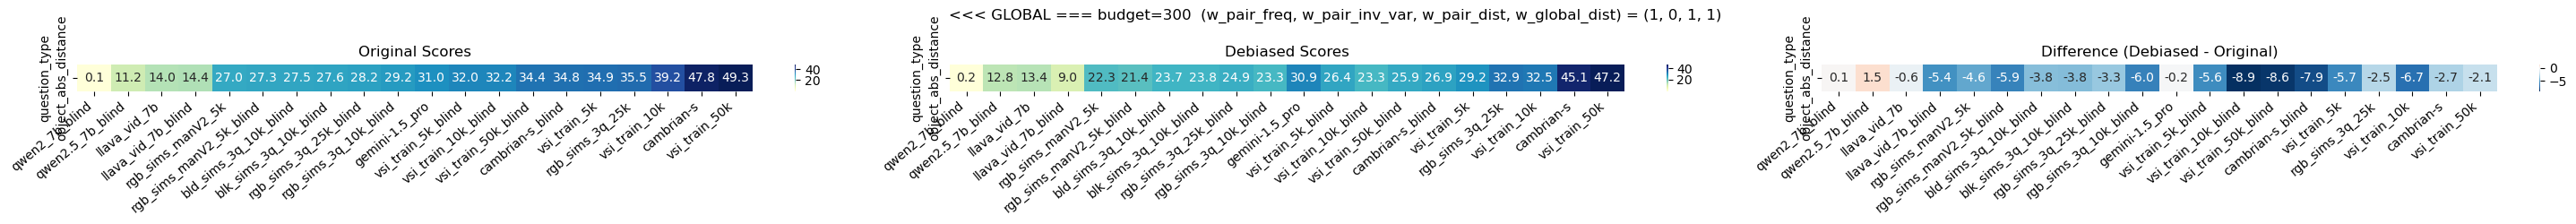

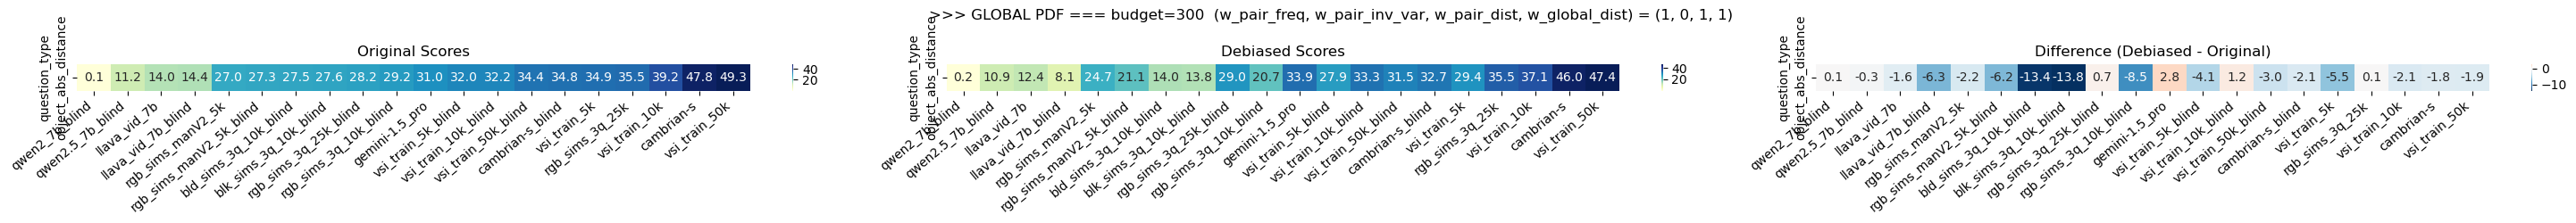

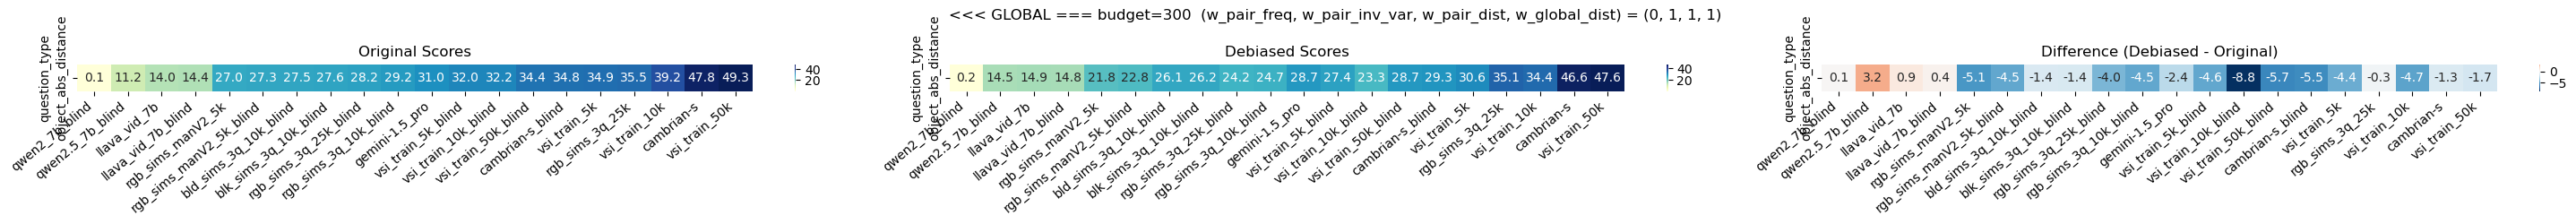

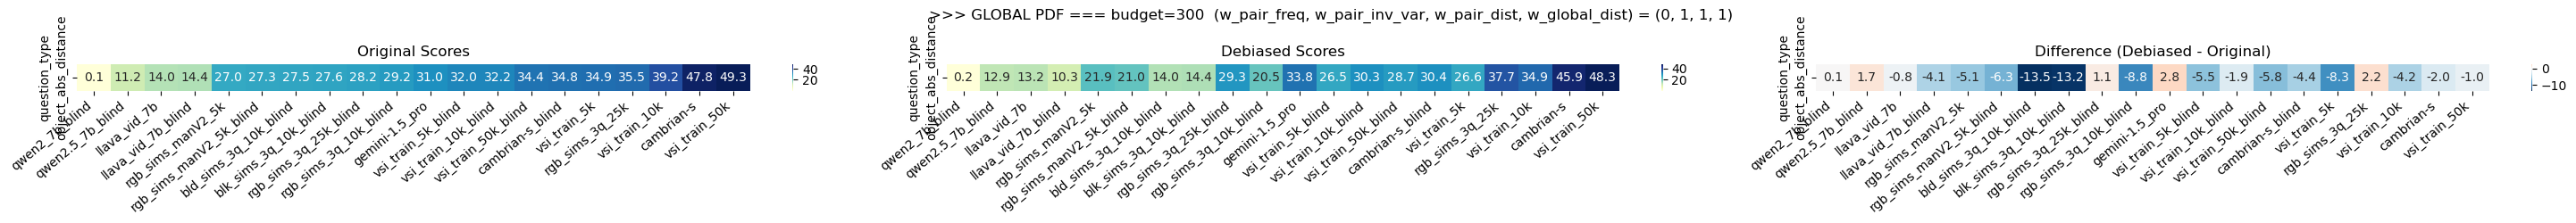

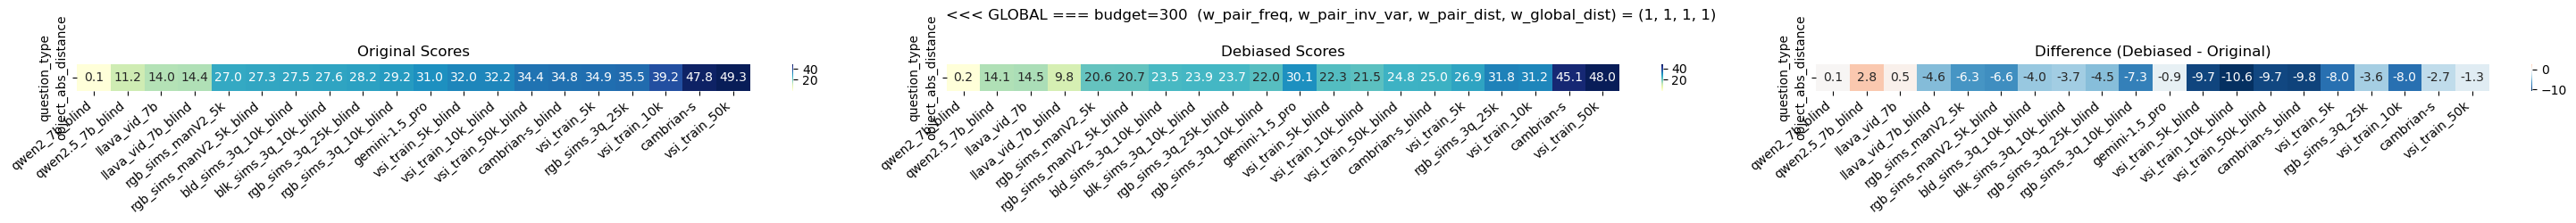

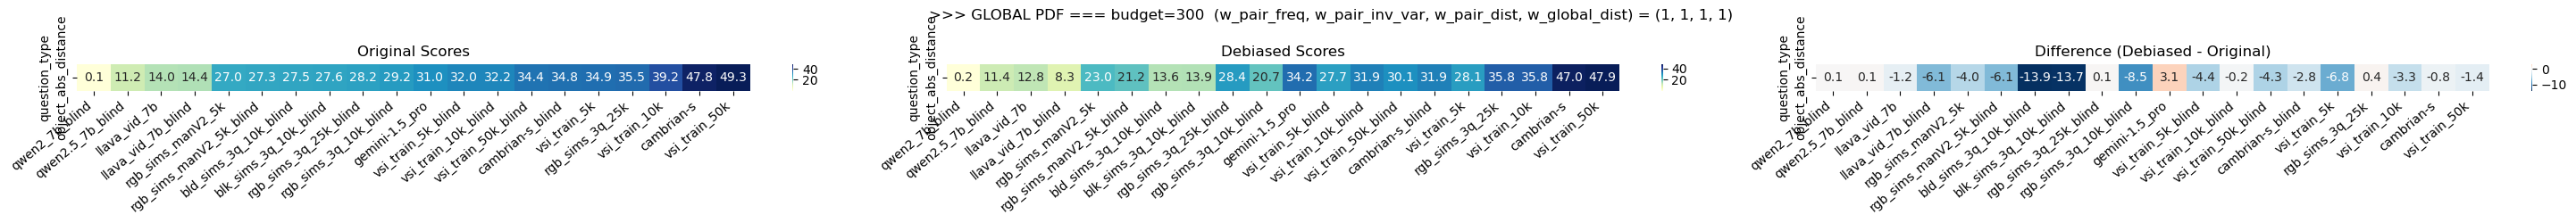

In [24]:
budget = 400
budget = 300

for w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist in (
    # (1, 0, 0, 0),
    # (0, 1, 0, 0),
    # (0, 0, 1, 0),
    (0, 0, 0, 1),
    # (1, 1, 0, 0),
    # (1, 0, 1, 0),
    (1, 0, 0, 1),
    # (0, 1, 1, 0),
    (0, 1, 0, 1),
    (0, 0, 1, 1),
    # (1, 1, 1, 0),
    (1, 1, 0, 1),
    (1, 0, 1, 1),
    (0, 1, 1, 1),
    (1, 1, 1, 1),
):
    ids = dv.filter_object_abs_distance_scored_log_global(qdf, budget=budget, w_pair_freq=w_pair_freq, w_pair_inv_var=w_pair_inv_var, w_pair_dist=w_pair_dist, w_global_dist=w_global_dist, min_samples_per_pair=0)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"<<< GLOBAL === budget={budget}  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = ({w_pair_freq}, {w_pair_inv_var}, {w_pair_dist}, {w_global_dist})");

    ids_pdf = dv.filter_object_abs_distance_scored_log_global_pdf(qdf, budget=budget, w_pair_freq=w_pair_freq, w_pair_inv_var=w_pair_inv_var, w_pair_dist=w_pair_dist, w_global_dist=w_global_dist, min_samples_per_pair=0)
    deb_pdf_qdf = qdf.loc[~qdf["id"].isin(ids_pdf)]
    removed_pdf_qdf = qdf.loc[qdf["id"].isin(ids_pdf)]
    dv.visualize_debiasing_impact(qdf, deb_pdf_qdf, title=f">>> GLOBAL PDF === budget={budget}  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = ({w_pair_freq}, {w_pair_inv_var}, {w_pair_dist}, {w_global_dist})");

    # check if the id lists are identical
    print(f"budget={budget}  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = ({w_pair_freq}, {w_pair_inv_var}, {w_pair_dist}, {w_global_dist})");
    if set(ids) == set(ids_pdf):
        print("ALL IDENTICAL")
    else:
        print(f"\t- DIFFERENT:{len(set(ids) - set(ids_pdf))} in ids but not in ids_pdf");


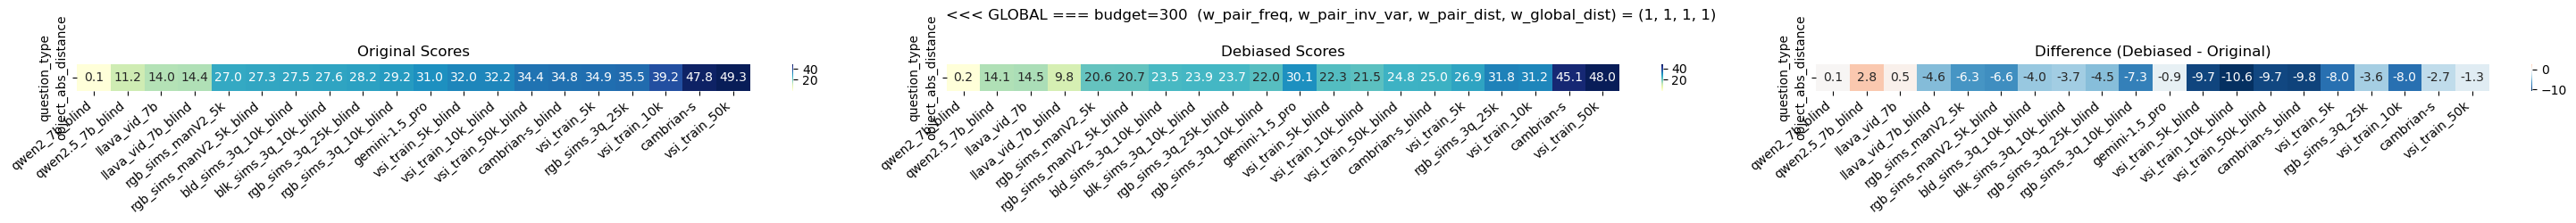

In [25]:
budget = 400
budget = 300

# BEST VERSION

w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist = (1, 1, 1, 1)

ids = dv.filter_object_abs_distance_scored_log_global(qdf, budget=budget, w_pair_freq=w_pair_freq, w_pair_inv_var=w_pair_inv_var, w_pair_dist=w_pair_dist, w_global_dist=w_global_dist, min_samples_per_pair=0)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"<<< GLOBAL === budget={budget}  (w_pair_freq, w_pair_inv_var, w_pair_dist, w_global_dist) = ({w_pair_freq}, {w_pair_inv_var}, {w_pair_dist}, {w_global_dist})");


In [26]:
removed_qdf.head()

id      dataset scene_name        question_type  \
680  681  arkitscenes   41069025  object_abs_distance   
681  682  arkitscenes   41069025  object_abs_distance   
682  683  arkitscenes   41069043  object_abs_distance   
684  685  arkitscenes   41125760  object_abs_distance   
687  688  arkitscenes   41159504  object_abs_distance   

                                              question ground_truth options  \
680  Measuring from the closest point of each objec...          2.9    None   
681  Measuring from the closest point of each objec...          2.1    None   
682  Measuring from the closest point of each objec...          1.1    None   
684  Measuring from the closest point of each objec...          1.0    None   
687  Measuring from the closest point of each objec...          0.9    None   

     bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  ...  \
680                    0.0                    0.0         0.5  ...   
681                    0.2                    0.2         1.0  ...   
682                    0.1                    0.1         0.9  ...   
684                    0.7                    0.7         1.0  ...   
687                    0.4                    0.4         0.8  ...   

     vsi_train_50k  vsi_train_50k_blind  vsi_train_5k  vsi_train_5k_blind  \
680            0.3                  1.0           0.7                 0.7   
681            0.8                  0.2           0.8                 0.4   
682            0.0                  0.0           0.3                 0.5   
684            0.5                  0.7           0.5                 0.3   
687            0.8                  0.0           0.6                 0.0   

     ground_truth_num  object_1  object_2     object_pair  \
680               2.9        tv     stove        stove_tv   
681               2.1        tv      sofa         sofa_tv   
682               1.1        tv       bed          bed_tv   
684               1.0   bathtub    toilet  bathtub_toilet   
687               0.9    toilet   bathtub  bathtub_toilet   

     object_ordered_pair               category_pair  
680             tv_stove        stove (in meters)_tv  
681              tv_sofa         sofa (in meters)_tv  
682               tv_bed          bed (in meters)_tv  
684       bathtub_toilet  bathtub_toilet (in meters)  
687       toilet_bathtub  bathtub (in meters)_toilet  

[5 rows x 33 columns]

In [27]:
a = dv.evaluate_models(qdf.loc[qdf["id"].isin(ids)])
b = dv.evaluate_models(qdf.loc[~qdf["id"].isin(ids)])
c = dv.evaluate_models(qdf)
d = b - c
# concat the dfs
# pd.concat([a, b], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased"})
# pd.concat([a, b, c], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original"})
pd.concat([a, b, c, d], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original", 3: "Difference"}).T.sort_values("Difference")

Removed   Debiased   Original  Difference
vsi_train_10k_blind      51.100000  21.516854  32.158273  -10.641419
cambrian-s_blind         52.266667  24.981273  34.796163   -9.814890
vsi_train_5k_blind       49.300000  22.303371  32.014388   -9.711018
vsi_train_50k_blind      51.633333  24.794007  34.448441   -9.654434
vsi_train_5k             49.200000  26.910112  34.928058   -8.017945
vsi_train_10k            53.366667  31.198502  39.172662   -7.974160
rgb_sims_3q_10k_blind    42.166667  21.985019  29.244604   -7.259586
rgb_sims_manV2_5k_blind  38.966667  20.749064  27.302158   -6.553095
rgb_sims_manV2_5k        38.200000  20.636704  26.954436   -6.317732
llava_vid_7b_blind       22.666667   9.775281  14.412470   -4.637189
rgb_sims_3q_25k_blind    36.300000  23.726592  28.249400   -4.522809
bld_sims_3q_10k_blind    34.633333  23.483146  27.494005   -4.010859
blk_sims_3q_10k_blind    34.166667  23.895131  27.589928   -3.694797
rgb_sims_3q_25k          41.933333  31.816479  35.455635   -3.639156
cambrian-s               52.666667  45.131086  47.841727   -2.710640
vsi_train_50k            51.633333  47.977528  49.292566   -1.315038
gemini-1.5_pro           32.600000  30.149813  31.031175   -0.881362
qwen2_7b_blind            0.000000   0.187266   0.119904    0.067362
llava_vid_7b             13.100000  14.531835  14.016787    0.515049
qwen2.5_7b_blind          6.200000  14.082397  11.247002    2.835395

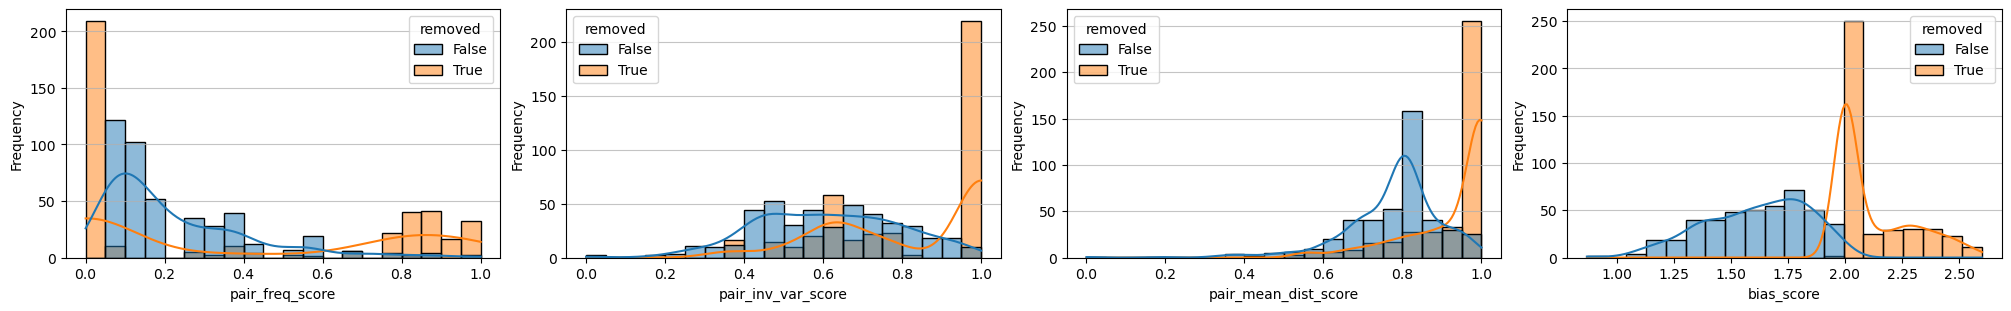

In [28]:
budget = 400
w_pair_freq = 1.0
w_ratio = 1.0
w_dist = 1.0

min_samples_per_pair = 2
min_samples_per_pair = 0

df_sorted = dv.get_object_abs_distance_bias(qdf, w_pair_freq, w_ratio, w_dist)

remove_ids = []
kept_counts = df_sorted['object_pair'].value_counts().to_dict()

for _, row in df_sorted.iterrows():
    if len(remove_ids) >= budget:
        break # Budget met

    pair_name = row['object_pair']

    # Check if removing this sample respects min_samples constraint
    if kept_counts.get(pair_name, 0) > min_samples_per_pair:
        remove_ids.append(row['id'])
        kept_counts[pair_name] -= 1

df_sorted["removed"] = df_sorted["id"].isin(remove_ids)
filtered_df = df_sorted[~df_sorted['id'].isin(remove_ids)]
removed_df = df_sorted[df_sorted['id'].isin(remove_ids)]
removed_df.sort_values("bias_score", ascending=False)

# Visualize the distribution of scores in subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 3), constrained_layout=True)


scores = ["pair_freq_score", "pair_inv_var_score", "pair_mean_dist_score", "bias_score"]

for i, score in enumerate(scores):
    sns.histplot(data=df_sorted, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)
plt.show()


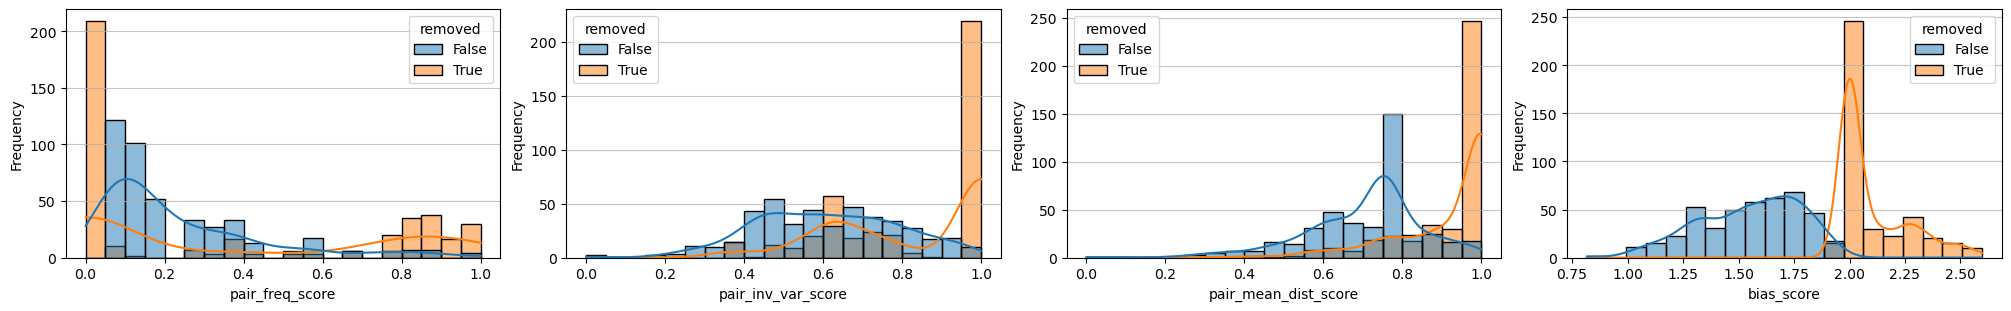

In [29]:
budget = 400
w_pair_freq = 1.0
w_ratio = 1.0
w_log_dist = 1.0

min_samples_per_pair = 1
min_samples_per_pair = 0

df_sorted = dv.get_object_abs_distance_scored_log(qdf, w_pair_freq, w_ratio, w_log_dist)

remove_ids = []
kept_counts = df_sorted['object_pair'].value_counts().to_dict()

for _, row in df_sorted.iterrows():
    if len(remove_ids) >= budget:
        break # Budget met

    pair_name = row['object_pair']

    # Check if removing this sample respects min_samples constraint
    if kept_counts.get(pair_name, 0) > min_samples_per_pair:
        remove_ids.append(row['id'])
        kept_counts[pair_name] -= 1

df_sorted["removed"] = df_sorted["id"].isin(remove_ids)
filtered_df = df_sorted[~df_sorted['id'].isin(remove_ids)]
removed_df = df_sorted[df_sorted['id'].isin(remove_ids)]
removed_df.sort_values("bias_score", ascending=False)

# Visualize the distribution of scores in subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 3), constrained_layout=True)

scores = ["pair_freq_score", "pair_inv_var_score", "pair_mean_dist_score", "bias_score"]

# plot_df = df_sorted[df_sorted["object_pair"].map(kept_counts) >= min_samples_per_pair]
plot_df = df_sorted
for i, score in enumerate(scores):
    sns.histplot(data=plot_df, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)
plt.show()

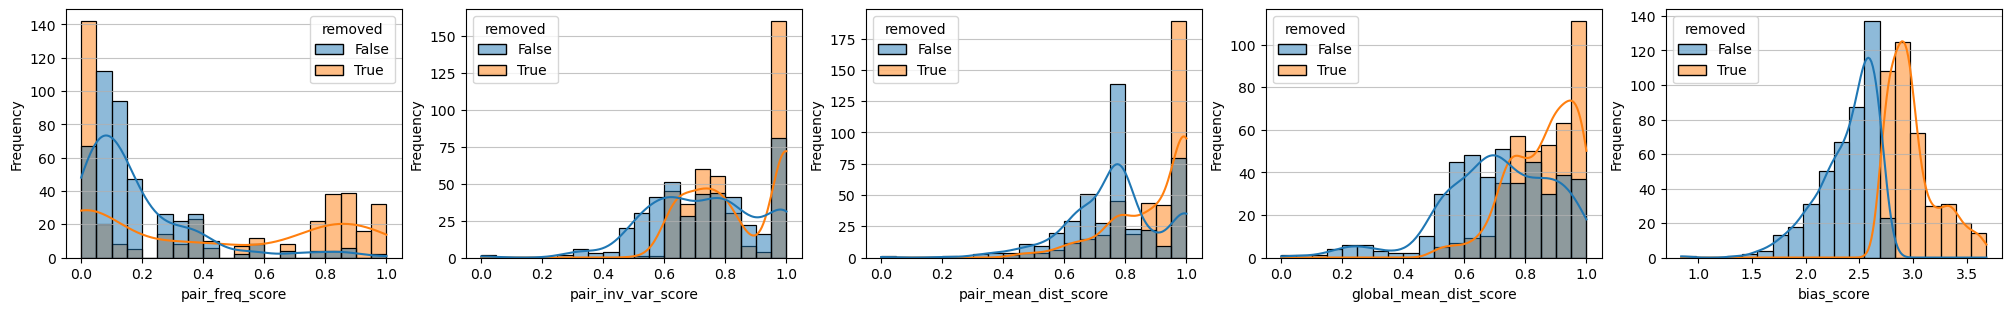

In [30]:
budget = 400
w_pair_freq = 1.0
w_ratio = 1.0
w_log_dist = 1.0
w_global_pdf = 1.0

min_samples_per_pair = 1
min_samples_per_pair = 0

df_sorted = dv.get_object_abs_distance_scored_log_global(qdf, w_pair_freq, w_ratio, w_log_dist, w_global_pdf)

remove_ids = []
kept_counts = df_sorted['object_pair'].value_counts().to_dict()

for _, row in df_sorted.iterrows():
    if len(remove_ids) >= budget:
        break # Budget met

    pair_name = row['object_pair']

    # Check if removing this sample respects min_samples constraint
    if kept_counts.get(pair_name, 0) > min_samples_per_pair:
        remove_ids.append(row['id'])
        kept_counts[pair_name] -= 1

df_sorted["removed"] = df_sorted["id"].isin(remove_ids)
filtered_df = df_sorted[~df_sorted['id'].isin(remove_ids)]
removed_df = df_sorted[df_sorted['id'].isin(remove_ids)]
removed_df.sort_values("bias_score", ascending=False)

# Visualize the distribution of scores in subplots
scores = ["pair_freq_score", "pair_inv_var_score", "pair_mean_dist_score", "global_mean_dist_score",  "bias_score"]

fig, axes = plt.subplots(1, len(scores), figsize=(20, 3), constrained_layout=True)


# plot_df = df_sorted[df_sorted["object_pair"].map(kept_counts) >= min_samples_per_pair]
plot_df = df_sorted

for i, score in enumerate(scores):
    sns.histplot(data=plot_df, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)
plt.show()

Global Lognormal fit: shape=0.69, loc=0.00, scale=1.79


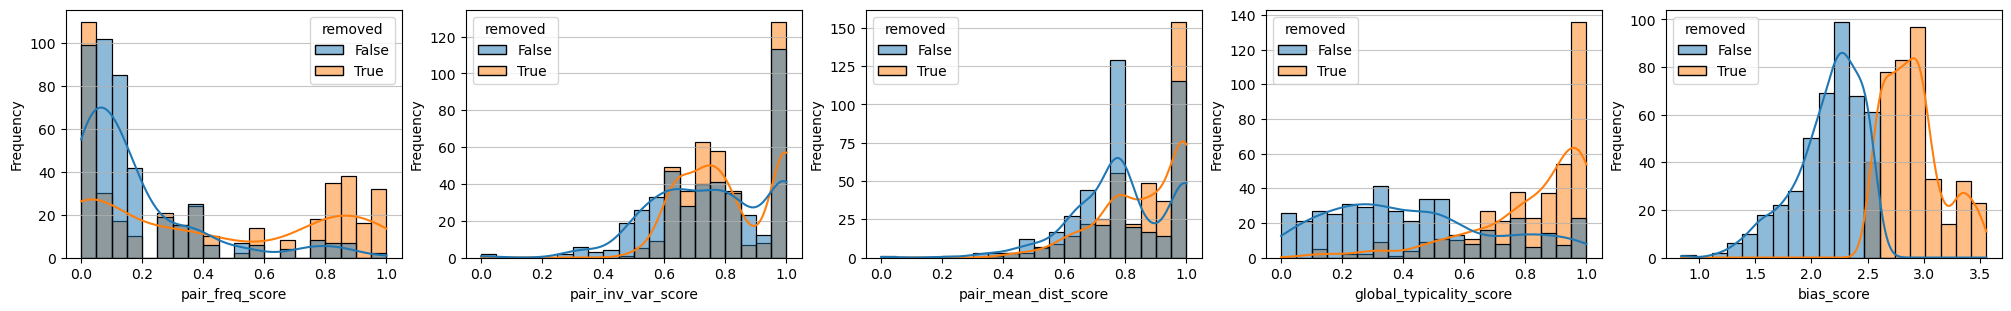

In [31]:
budget = 400
w_pair_freq = 1.0
w_ratio = 1.0
w_log_dist = 1.0
w_global_pdf = 1.0

min_samples_per_pair = 1
min_samples_per_pair = 0

df_sorted = dv.get_object_abs_distance_scored_log_global_pdf(qdf, w_pair_freq, w_ratio, w_log_dist, w_global_pdf)

remove_ids = []
kept_counts = df_sorted['object_pair'].value_counts().to_dict()

for _, row in df_sorted.iterrows():
    if len(remove_ids) >= budget:
        break # Budget met

    pair_name = row['object_pair']

    # Check if removing this sample respects min_samples constraint
    if kept_counts.get(pair_name, 0) > min_samples_per_pair:
        remove_ids.append(row['id'])
        kept_counts[pair_name] -= 1

df_sorted["removed"] = df_sorted["id"].isin(remove_ids)
filtered_df = df_sorted[~df_sorted['id'].isin(remove_ids)]
removed_df = df_sorted[df_sorted['id'].isin(remove_ids)]
removed_df.sort_values("bias_score", ascending=False)

# Visualize the distribution of scores in subplots
scores = ["pair_freq_score", "pair_inv_var_score", "pair_mean_dist_score", "global_typicality_score",  "bias_score"]
fig, axes = plt.subplots(1, len(scores), figsize=(20, 3), constrained_layout=True)

# plot_df = df_sorted[df_sorted["object_pair"].map(kept_counts) >= min_samples_per_pair]
plot_df = df_sorted

for i, score in enumerate(scores):
    sns.histplot(data=plot_df, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)
plt.show()

In [32]:
df_sorted.to_csv("abs_distance_debiasing.csv", index=False)

In [33]:
# pd turn off column display limit
pd.set_option("display.max_columns", None)
df_sorted.sort_values("pair_inv_var_score", ascending=False)

id    dataset    scene_name        question_type  \
692  4816    scannet  scene0568_02  object_abs_distance   
278  1598  scannetpp    7b6477cb95  object_abs_distance   
326  1646  scannetpp    3e8bba0176  object_abs_distance   
328  1648  scannetpp    3e8bba0176  object_abs_distance   
458  1778  scannetpp    09c1414f1b  object_abs_distance   
..    ...        ...           ...                  ...   
340  1660  scannetpp    38d58a7a31  object_abs_distance   
615  4739    scannet  scene0695_00  object_abs_distance   
822  4947    scannet  scene0231_00  object_abs_distance   
341  1661  scannetpp    38d58a7a31  object_abs_distance   
441  1761  scannetpp    ac48a9b736  object_abs_distance   

                                              question ground_truth options  \
692  Measuring from the closest point of each objec...          3.6    None   
278  Measuring from the closest point of each objec...          0.7    None   
326  Measuring from the closest point of each objec...          1.8    None   
328  Measuring from the closest point of each objec...          1.8    None   
458  Measuring from the closest point of each objec...          1.8    None   
..                                                 ...          ...     ...   
340  Measuring from the closest point of each objec...          6.8    None   
615  Measuring from the closest point of each objec...          0.4    None   
822  Measuring from the closest point of each objec...          2.2    None   
341  Measuring from the closest point of each objec...          0.4    None   
441  Measuring from the closest point of each objec...         12.6    None   

     bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  \
692                    0.0                    0.0         0.2   
278                    0.2                    0.2         0.0   
326                    0.2                    0.2         0.4   
328                    0.2                    0.2         0.4   
458                    0.4                    0.2         0.0   
..                     ...                    ...         ...   
340                    0.0                    0.0         1.0   
615                    0.0                    0.0         0.0   
822                    0.0                    0.0         0.6   
341                    0.0                    0.0         0.6   
441                    0.0                    0.0         0.0   

     cambrian-s_blind  gemini-1.5_pro  llava_vid_7b  llava_vid_7b_blind  \
692               0.1             0.6           0.0                 0.0   
278               0.0             0.0           0.0                 0.0   
326               0.8             0.3           0.0                 0.0   
328               0.8             0.0           0.0                 0.0   
458               0.0             0.3           0.0                 0.0   
..                ...             ...           ...                 ...   
340               0.0             0.4           0.0                 0.0   
615               0.0             0.6           0.6                 0.0   
822               0.9             0.8           0.0                 0.0   
341               0.0             0.0           0.6                 0.0   
441               0.0             0.0           0.0                 0.0   

     qwen2.5_7b_blind  qwen2_7b_blind  rgb_sims_3q_10k_blind  rgb_sims_3q_25k  \
692               0.0             0.0                    0.0              0.7   
278               0.5             0.0                    0.0              1.0   
326               0.0             0.0                    0.4              0.0   
328               0.0             0.0                    0.4              0.4   
458               0.0             0.0                    0.4              0.0   
..                ...             ...                    ...              ...   
340               0.0             0.0                    0.0              0.0   
615               0

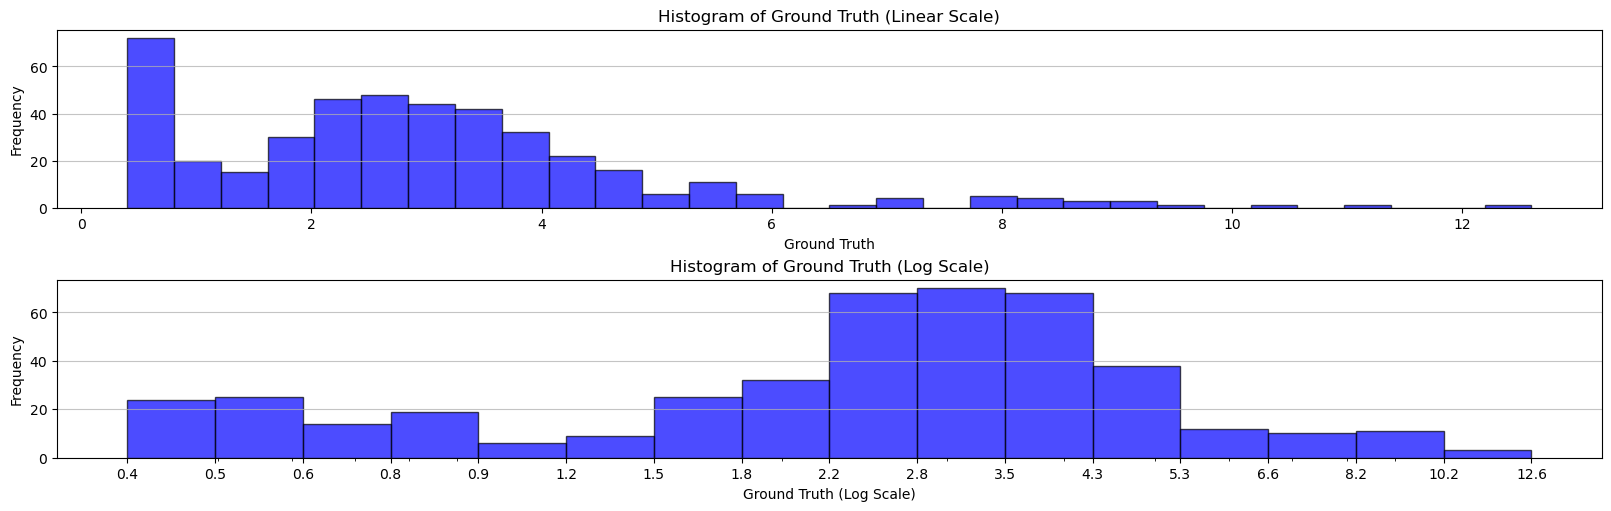

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(16, 5), constrained_layout=True)

# First plot: Linear scale
# gt_series = qdf['ground_truth'].dropna()
# gt_series = removed_df['ground_truth'].dropna()
gt_series = filtered_df['ground_truth'].astype(float).dropna()
gt_series.plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black', ax=axes[0], density=False)
axes[0].set_xlabel('Ground Truth')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Ground Truth (Linear Scale)')
axes[0].grid(axis='y', alpha=0.75)

# Second plot: Log scale
bins = np.logspace(np.log10(gt_series.min()), np.log10(gt_series.max()), 17)
gt_series.plot(kind='hist', bins=bins, alpha=0.7, color='blue', edgecolor='black', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_xlabel('Ground Truth (Log Scale)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Ground Truth (Log Scale)')
axes[1].grid(axis='y', alpha=0.75)

# Set x-ticks for the log scale plot
ticks = bins
axes[1].set_xticks(ticks)
axes[1].set_xticklabels([f"{tick:.1f}" for tick in ticks])

plt.show()


In [35]:
df_sorted.sort_values("pair_inv_var_score", ascending=True)

id    dataset    scene_name        question_type  \
441  1761  scannetpp    ac48a9b736  object_abs_distance   
341  1661  scannetpp    38d58a7a31  object_abs_distance   
822  4947    scannet  scene0231_00  object_abs_distance   
615  4739    scannet  scene0695_00  object_abs_distance   
340  1660  scannetpp    38d58a7a31  object_abs_distance   
..    ...        ...           ...                  ...   
625  4749    scannet  scene0697_01  object_abs_distance   
520  4642    scannet  scene0354_00  object_abs_distance   
788  4913    scannet  scene0164_02  object_abs_distance   
323  1643  scannetpp    5eb31827b7  object_abs_distance   
749  4874    scannet  scene0050_01  object_abs_distance   

                                              question ground_truth options  \
441  Measuring from the closest point of each objec...         12.6    None   
341  Measuring from the closest point of each objec...          0.4    None   
822  Measuring from the closest point of each objec...          2.2    None   
615  Measuring from the closest point of each objec...          0.4    None   
340  Measuring from the closest point of each objec...          6.8    None   
..                                                 ...          ...     ...   
625  Measuring from the closest point of each objec...          3.0    None   
520  Measuring from the closest point of each objec...          3.0    None   
788  Measuring from the closest point of each objec...          1.0    None   
323  Measuring from the closest point of each objec...          3.1    None   
749  Measuring from the closest point of each objec...          1.0    None   

     bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  \
441                    0.0                    0.0         0.0   
341                    0.0                    0.0         0.6   
822                    0.0                    0.0         0.6   
615                    0.0                    0.0         0.0   
340                    0.0                    0.0         1.0   
..                     ...                    ...         ...   
625                    0.0                    0.0         0.5   
520                    0.0                    0.0         0.2   
788                    0.7                    1.0         1.0   
323                    0.0                    0.0         0.0   
749                    0.7                    0.7         0.3   

     cambrian-s_blind  gemini-1.5_pro  llava_vid_7b  llava_vid_7b_blind  \
441               0.0             0.0           0.0                 0.0   
341               0.0             0.0           0.6                 0.0   
822               0.9             0.8           0.0                 0.0   
615               0.0             0.6           0.6                 0.0   
340               0.0             0.4           0.0                 0.0   
..                ...             ...           ...                 ...   
625               0.4             0.1           0.0                 0.1   
520               0.4             0.7           0.1                 0.1   
788               0.1             0.7           0.1                 0.0   
323               0.0             0.7           0.0                 0.0   
749               0.0             0.0           0.1                 0.1   

     qwen2.5_7b_blind  qwen2_7b_blind  rgb_sims_3q_10k_blind  rgb_sims_3q_25k  \
441               0.0             0.0                    0.0              0.0   
341               0.6             0.0                    0.0              0.0   
822               0.0             0.0                    0.1              0.9   
615               0.6             0.0                    0.0              0.0   
340               0.0             0.0                    0.0              0.0   
..                ...             ...                    ...              ...   
625               0.0             0.0                    0.2              0.6   
520               0

In [36]:
models = sorted(dv.get_model_columns(df_sorted))
models

['bld_sims_3q_10k_blind',
 'blk_sims_3q_10k_blind',
 'cambrian-s',
 'cambrian-s_blind',
 'gemini-1.5_pro',
 'llava_vid_7b',
 'llava_vid_7b_blind',
 'qwen2.5_7b_blind',
 'qwen2_7b_blind',
 'rgb_sims_3q_10k_blind',
 'rgb_sims_3q_25k',
 'rgb_sims_3q_25k_blind',
 'rgb_sims_manV2_5k',
 'rgb_sims_manV2_5k_blind',
 'vsi_train_10k',
 'vsi_train_10k_blind',
 'vsi_train_50k',
 'vsi_train_50k_blind',
 'vsi_train_5k',
 'vsi_train_5k_blind']

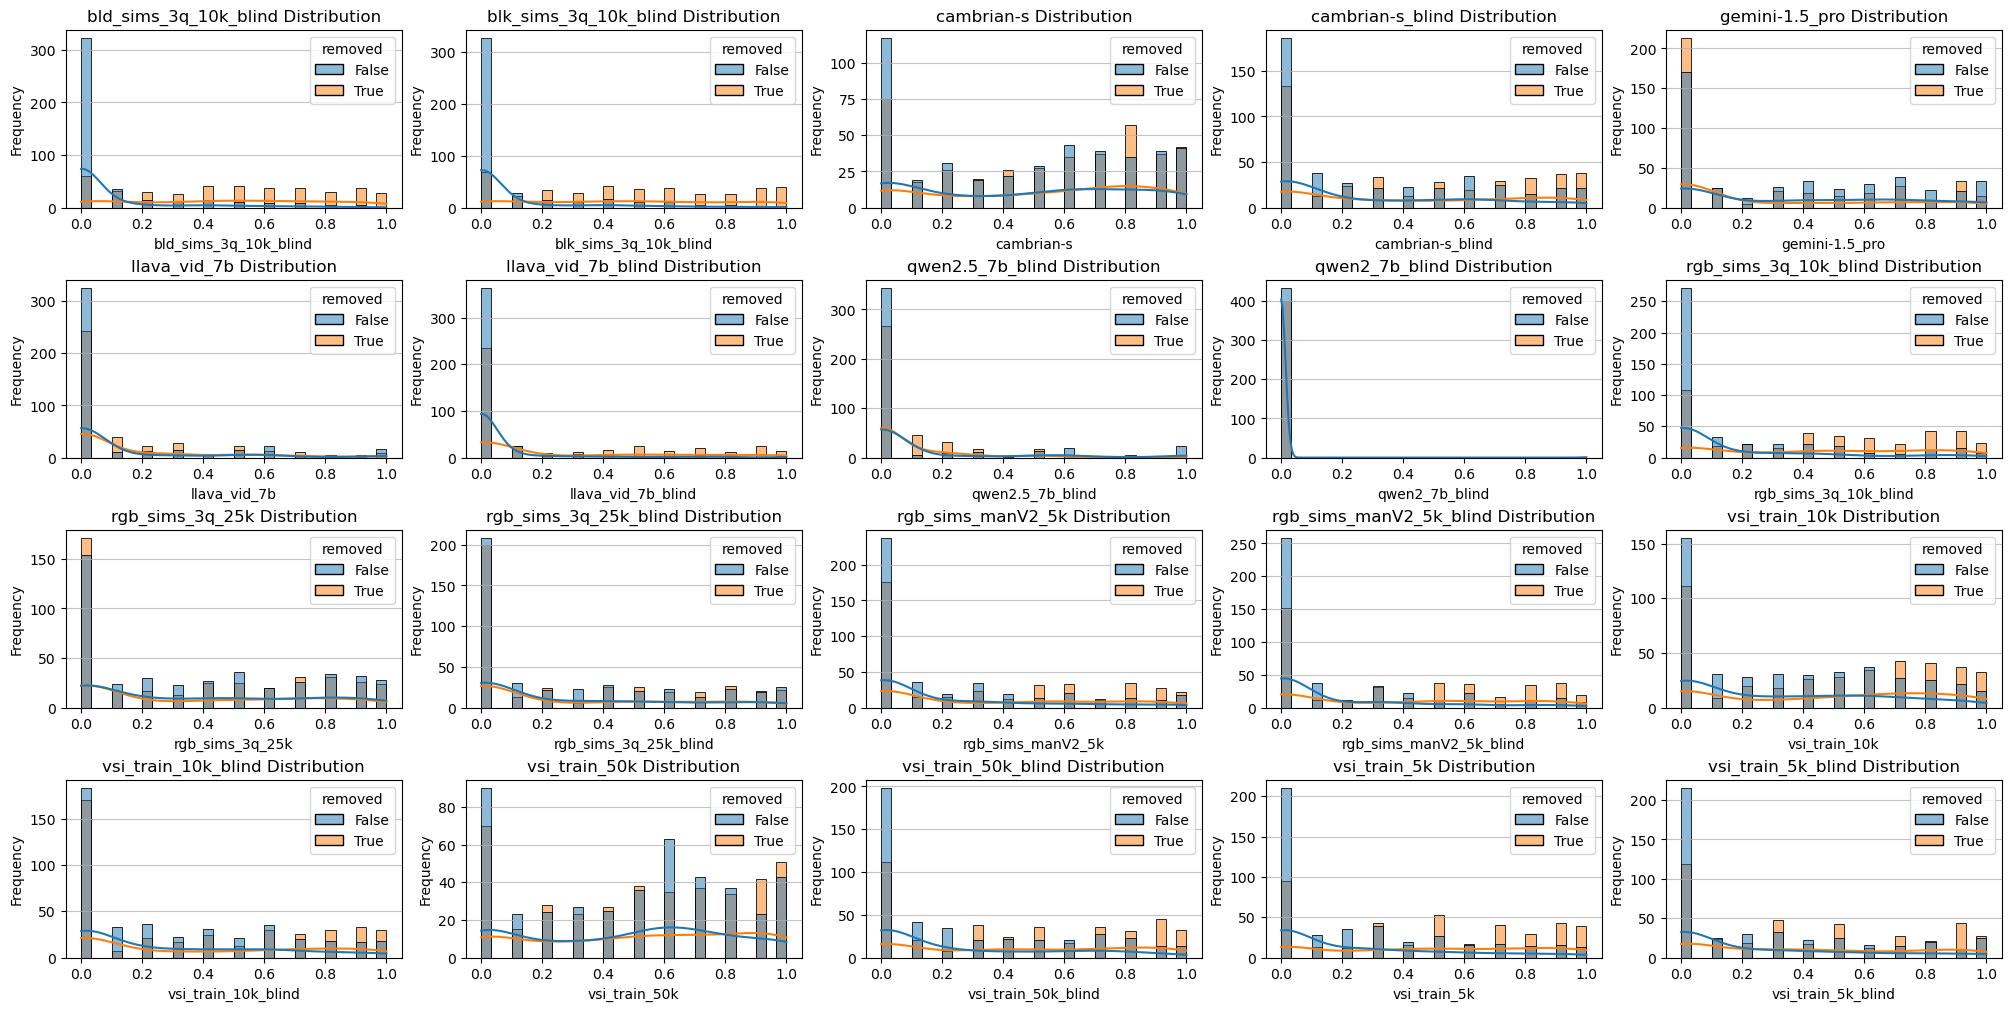

In [37]:
# plot the dist of the model cols colored by removed
fig, axes = plt.subplots(4, 5, figsize=(20, 10), constrained_layout=True)
for i, model in enumerate(models):
    ax = axes[i // 5, i % 5]
    sns.histplot(data=df_sorted, x=model, bins=30, kde=True, hue="removed", ax=ax)
    ax.set_title(f"{model} Distribution")
    ax.set_xlabel(model)
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', alpha=0.75)